
# INN Hotels Project context


A significant number of hotel bookings are called-off due to cancellations or no-shows for various reasons.Such revenue-diminishing losses are particularly high on last-minute cancellations.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.


## Objective

INN Hotels Group has a chain of hotels in Portugal, they are facing problems with high number of booking cancellations.
Analyze data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at hotel
* type_of_meal_plan: Type of meal plan booked by customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.


## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
hotel = pd.read_csv('INNHotelsGroup.csv')

In [3]:
data = hotel.copy() # creating a copy of original dataframe for further use

### View first and last 5 rows of dataset

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Understand shape of dataset

In [6]:
data.shape

(36275, 19)

### Check data types of columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
data.duplicated().sum() # checking for duplicate values

0

In [9]:
data.isnull().sum() # checking for null values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observations

* 36,275 rows and 19 columns in dataset
* "booking_status" is the categorical target variable
* There are 14 numeric and 5 categorical columns
* No missing data in columns
* No duplicate or null values


In [10]:
data.drop('Booking_ID', axis=1, inplace = True) # drop unique identifier Booking_ID column before further analysis

In [11]:
data.shape

(36275, 18)

## Exploratory Data Analysis (EDA)

In [12]:
data.describe(include = "all").T  #statistical summary of data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


#### Observations

* Average adult guest count is 2, max adult guest count is 4
* Average children guest count is 0, max is 10
* Average no of weekend nights stayed is 1, max is 7
* Average no of weeknights stayed is 3, max is 17
* Out of 4 unique meal plans, meal plan1 is most common
* Car park space is not a popular feature among guest bookings
* Out of unique room types, room type 1 is the most preferred
* Average booking lead time is about 85 days. Ranges between 0 - 443 days. Min is 0 and 25th percentile is 17 days
* There are 5 unique customer market segment types, Online being the most common
* Repeated guests do not seem very common in hotel
* Number of previous cancellations is very low, meaning most guests are first timers at hotel
* Average price per room is about 103 Euros, maximum value can go upto 540 euros
* Some guests can request upto 5 special requests at time of booking
* Majority of bookings are not cancelled, which is a positive sign for hotel



### Univariate Analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(8, 6), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Creating a dataframe copy for EDA

In [14]:
df = data.copy()

### Observations on lead time

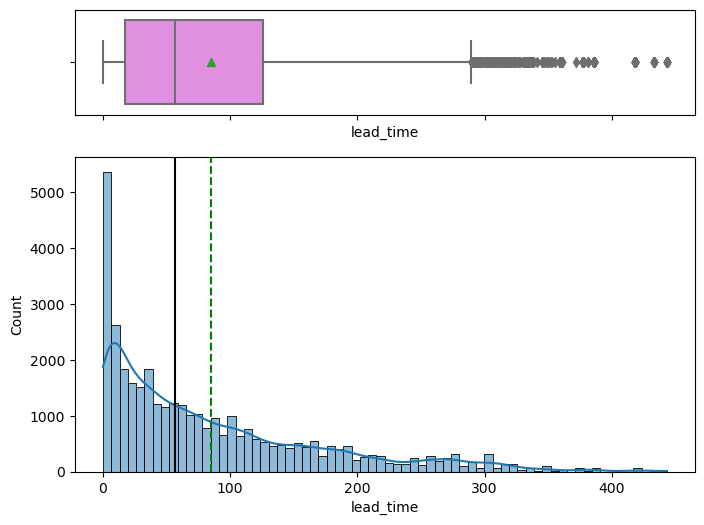

In [15]:
histogram_boxplot(df, "lead_time")

* lead time distribution is right skewed, mean greater than median
* there are some upper outliers

### Observations on average price per room

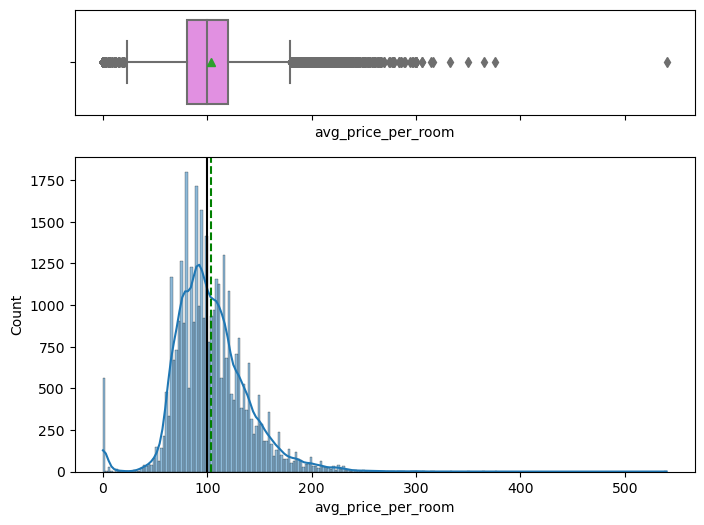

In [16]:
histogram_boxplot(df, "avg_price_per_room")

* Average price per room is somewhat normally distributed with some right skew
* Average price is about 100 euros
* There are outliers on both ends. There are some entries with room price zero and some,more than 500euros

### Observations on number of previous booking cancellations

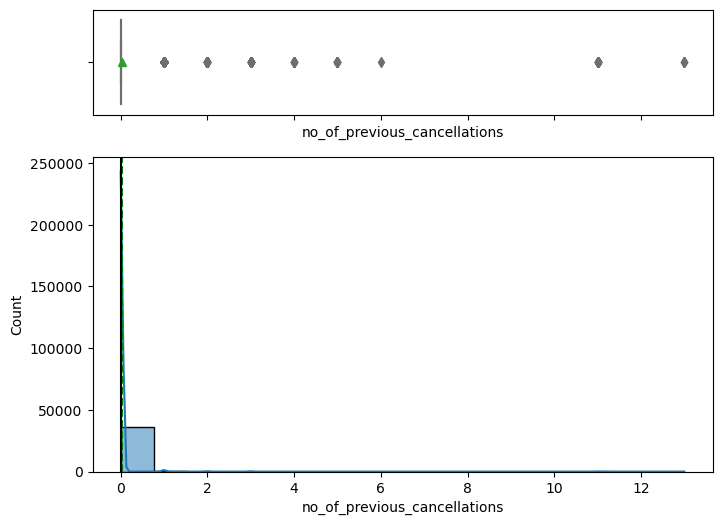

In [17]:
histogram_boxplot(df,"no_of_previous_cancellations")

* No of previous cancellations distribution is heavily right skewed.This indicates guests dont cancel much

### Observations on number of previous booking not canceled

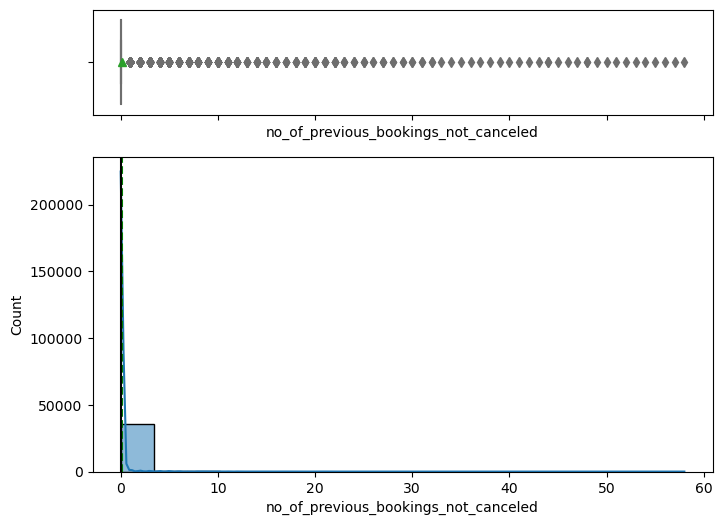

In [18]:
histogram_boxplot(df,"no_of_previous_bookings_not_canceled")

* Distribution is right skewed. Most guests have not cancelled bookings in the past

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on number of adults

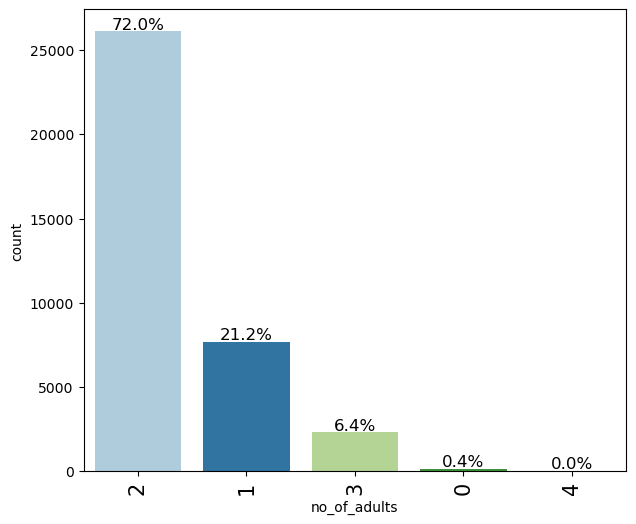

In [20]:
labeled_barplot(df, "no_of_adults")

* 72% of bookings involve 2 adults. 21% bookings with 1 adult.

### Observations on number of children

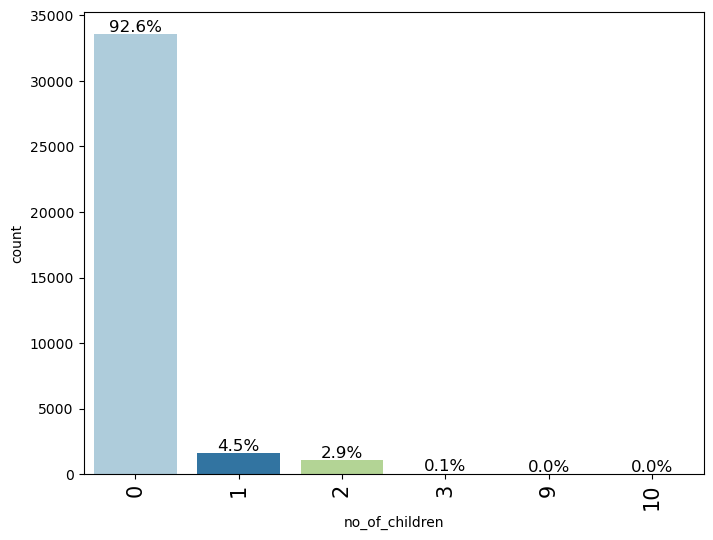

In [21]:
labeled_barplot(df, "no_of_children")

* 92% of hotel bookings involve 0 children

### Observations on number of week nights

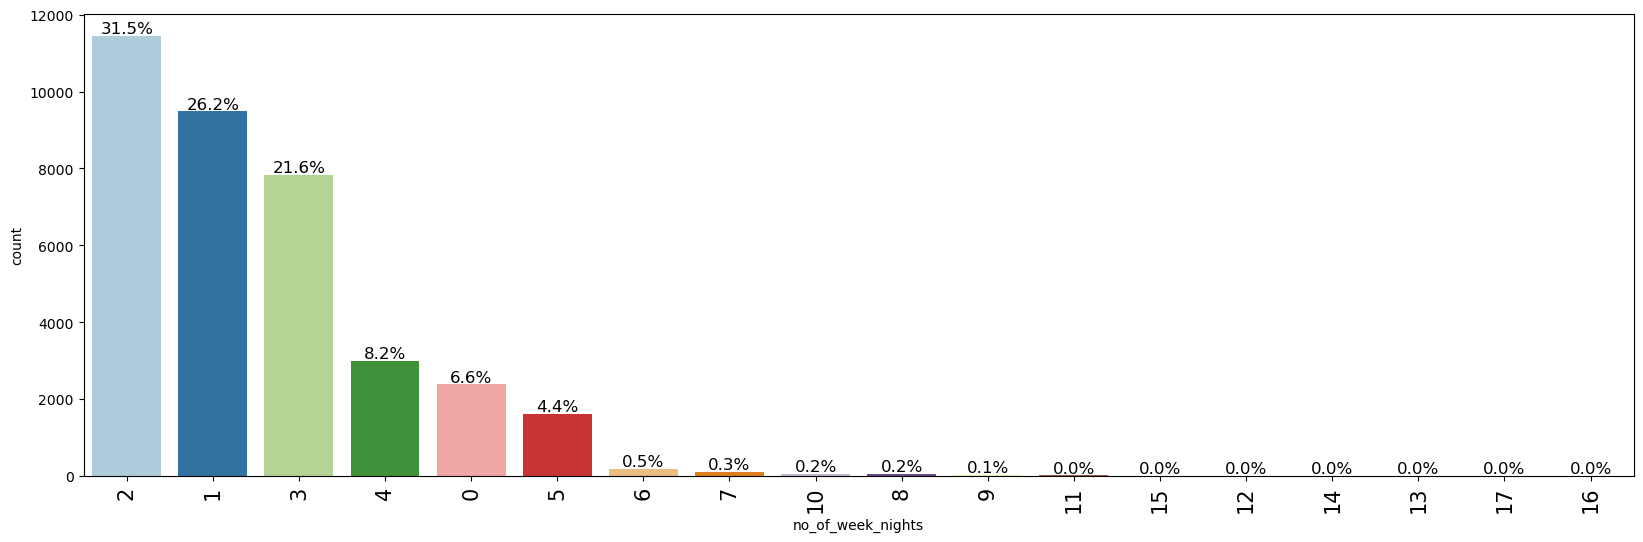

In [22]:
labeled_barplot(df, "no_of_week_nights")

* 32% of bookings are for 2 weeknights
* 26% of bookings are for 1 weeknight, followed by 22% - 3 weeknights

### Observations on number of weekend nights

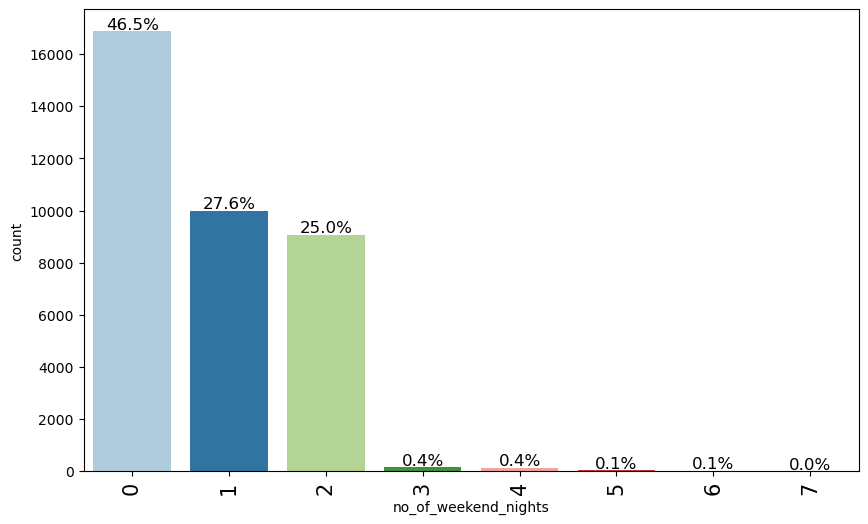

In [23]:
labeled_barplot(df, "no_of_weekend_nights")

* 46% bookings dont involve weekend stay
* Only about 50% (27.6% plus 25%) bookings involve 1 or 2 weekend night stay

### Observations on required car parking space

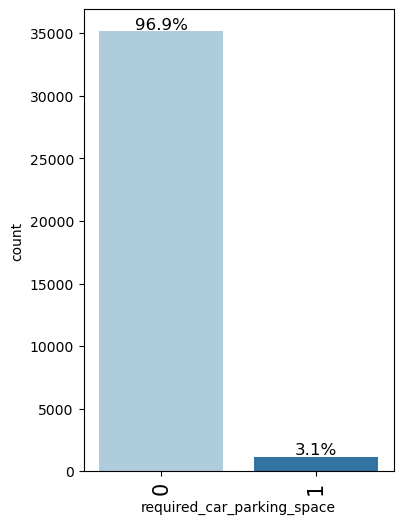

In [24]:
labeled_barplot(df, "required_car_parking_space")

* Most guest bookings do not include car park space

### Observations on type of meal plan

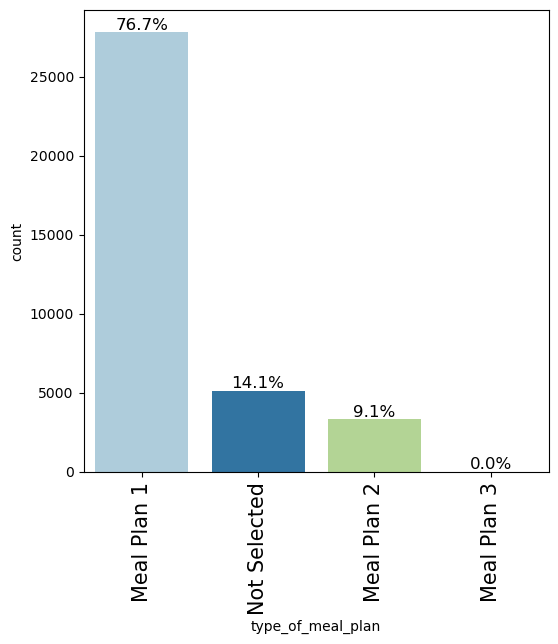

In [25]:
labeled_barplot(df, "type_of_meal_plan")

* 76% of guests choose Meal plan 1 while 14% guests do not pick a plan

### Observations on room type reserved

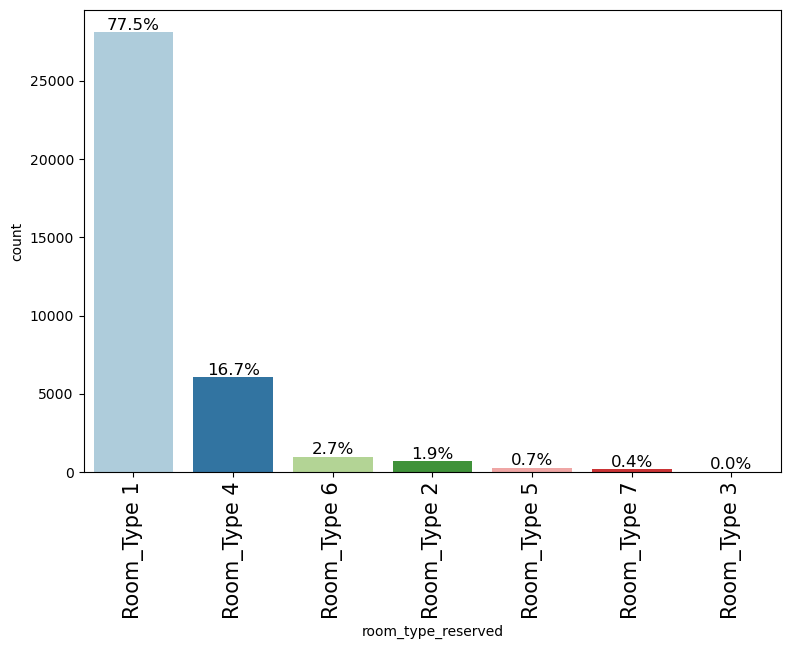

In [26]:
labeled_barplot(df, "room_type_reserved")

* 77% of bookings involve Room type 1. Room type 4, Room type 6, Room type 2 are the next popular types

### Observations on arrival month

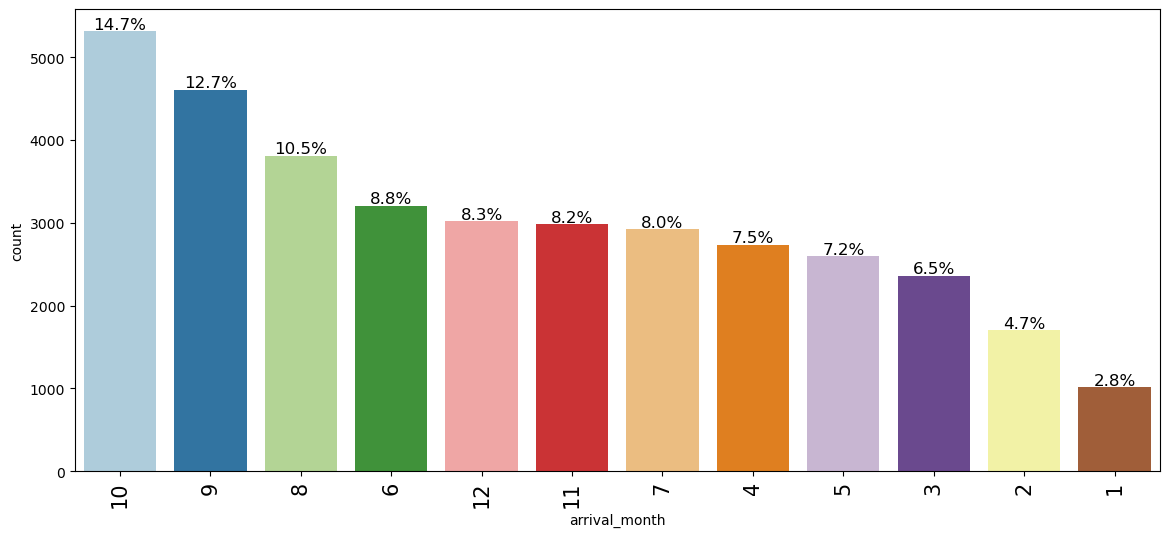

In [27]:
labeled_barplot(df, "arrival_month")

* October, September, August, June, December are the popular months for guest stay at the hotel
* Bookings tend to increase Feb-Oct and drop Nov-Jan

###  Observations on arrival year

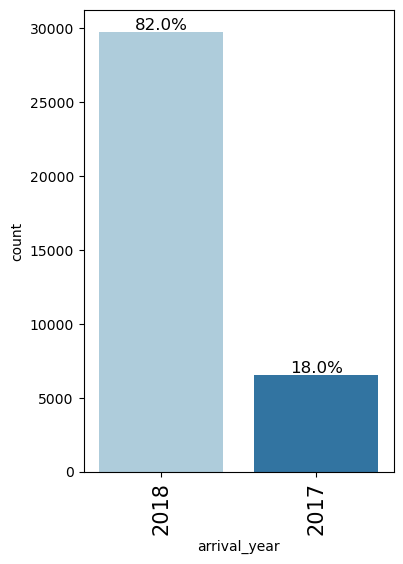

In [28]:
labeled_barplot(df, "arrival_year")

* Dataset contains info about bookings made in 2017 and 2018, 2018 makes up for 82% bookings

### Observations on market segment type

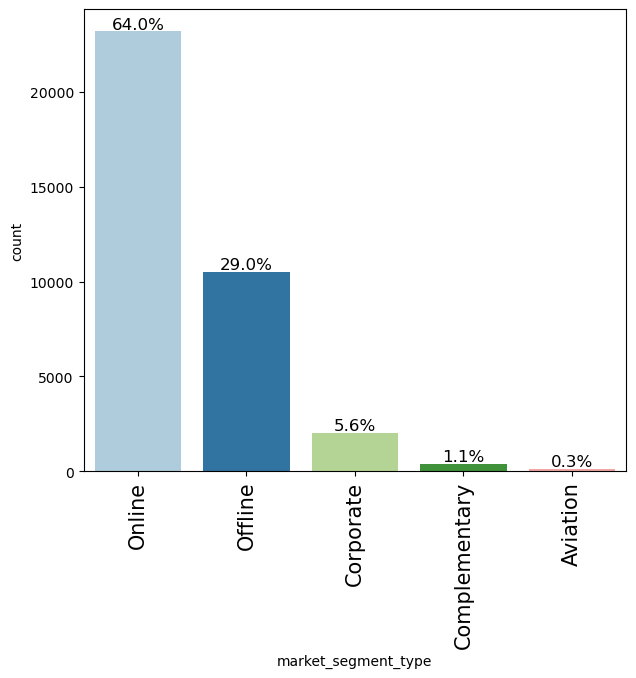

In [29]:
labeled_barplot(df, "market_segment_type")

* Online market segment makes up 64% of guest bookings, followed by offline (29%). Corporate contributes to 5% bookings

### Observations on number of special requests

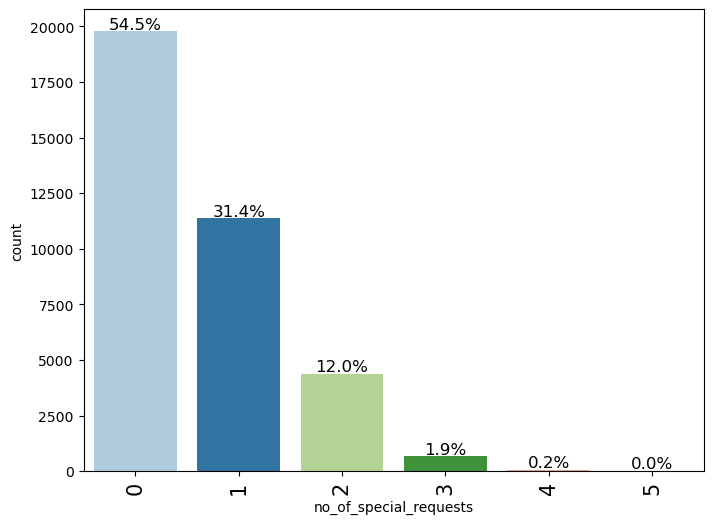

In [30]:
labeled_barplot(df, "no_of_special_requests")

* 31% of guests ask atleast 1 special request while 54% dont request

### Observations on booking status

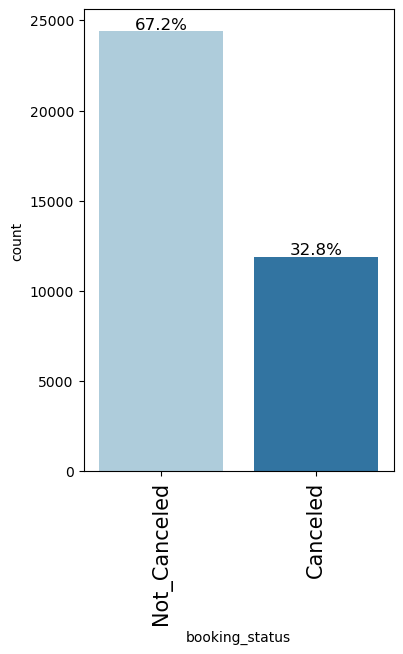

In [31]:
labeled_barplot(df, "booking_status")

* 67% bookings hold active status - "not-cancelled" while 32% bookings have been cancelled. We can further analyze cancellations. Lets encode canceled bookings to 1 and not-canceled as 0.

In [32]:
### Encoding Canceled bookings to 1 and Not_Canceled as 0

df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Observations on repeated guests

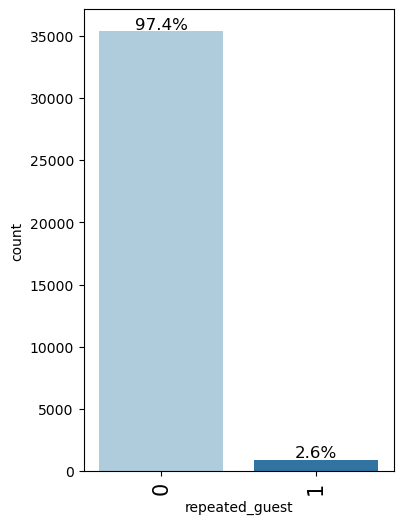

In [33]:
labeled_barplot(df, "repeated_guest")

In [34]:
df["repeated_guest"].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

* 97% of bookings are by new guests 

### Bivariate Analysis

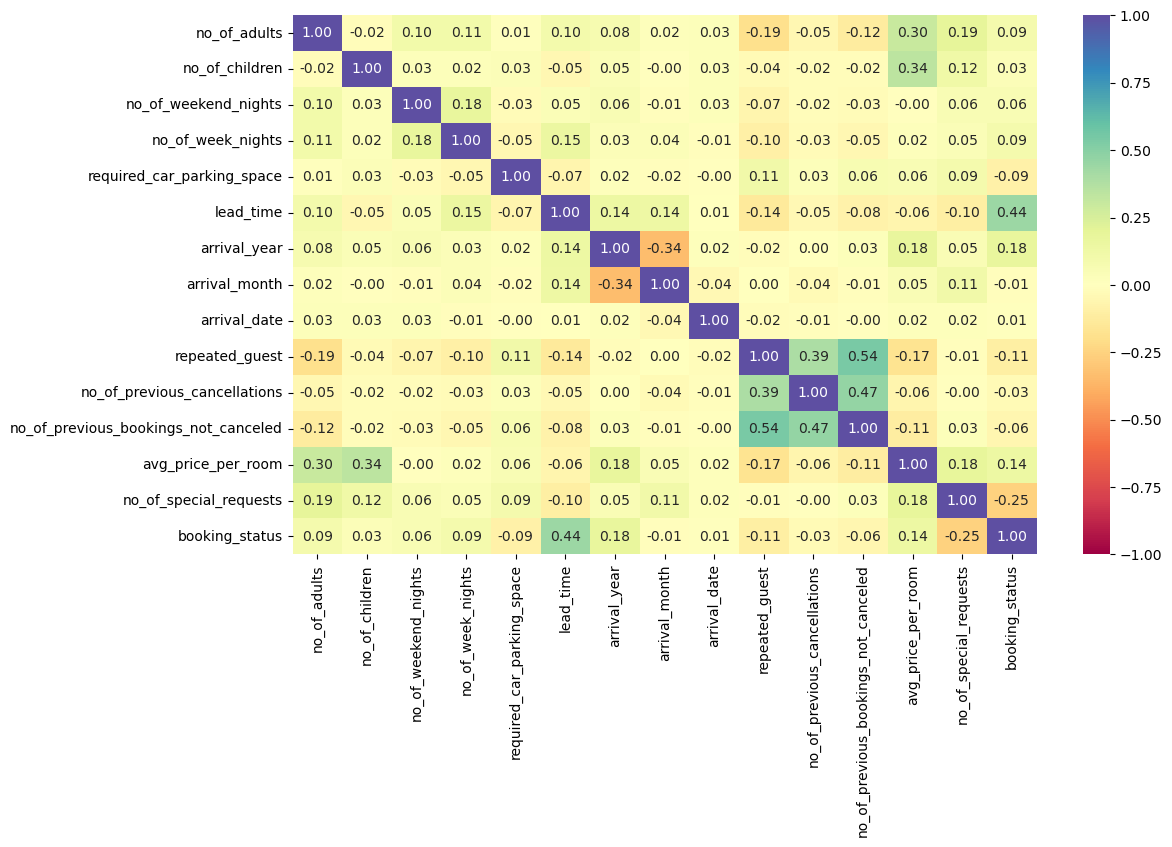

In [35]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* No significant case of high correlation among variables observed
* Lead time and booking status show positive correlation
* Booking status shows some positive correlation with avg_price_per_room and arrival_year
* Negative correlation observed between booking status and no_of_special request, repeated_guest, required_car_park_space

In [36]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [37]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Questions

1. What are the busiest months in the hotel?

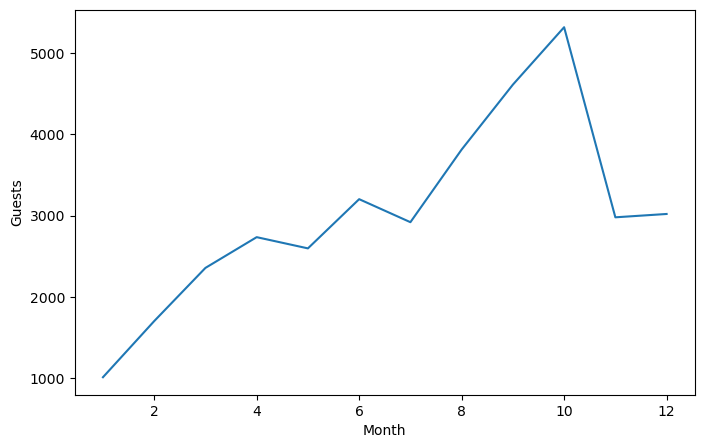

In [38]:
# grouping data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting trend over different months
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

In [39]:
df["arrival_month"].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

* October, September, August, June, December, November are the busiest months for INNHotels

####  2. Which market segment do most guests come from?

In [40]:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [41]:
df["market_segment_type"].value_counts(normalize = True)

Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: market_segment_type, dtype: float64

* Online market segment(63%) is where most guests come from, followed by offline and corporate.

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

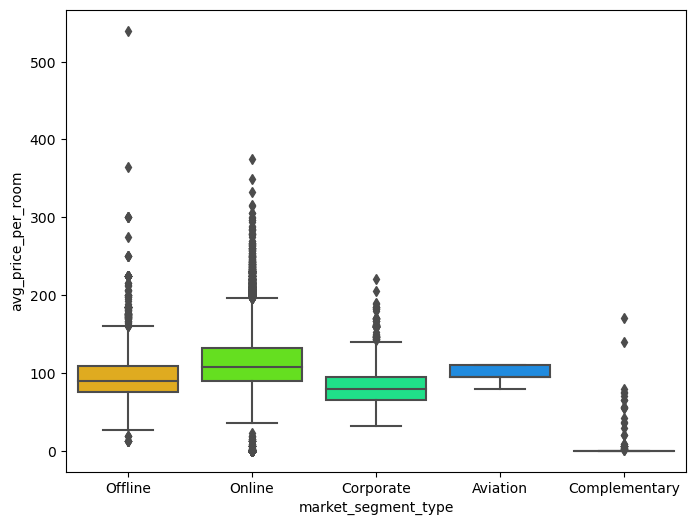

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Online market segment has the highest average price per room, followed by Aviation,Offline,Corporate.

#### 4. What percentage of bookings are cancelled? 

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


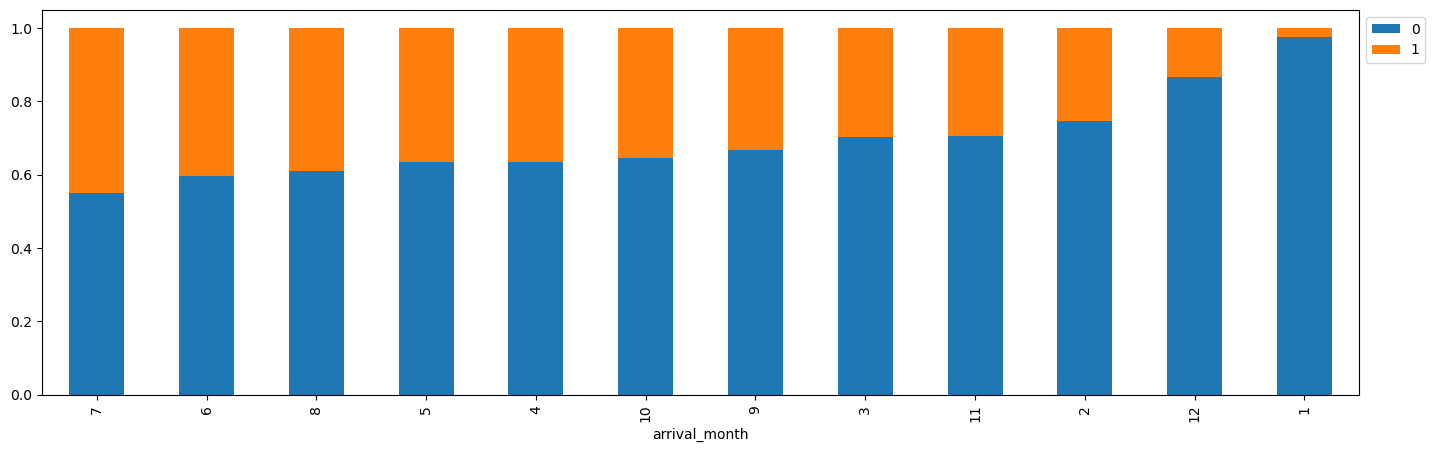

In [43]:
stacked_barplot(df, "arrival_month", "booking_status")

* 32% bookings are cancelled

#### 5. Repeating guests are guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


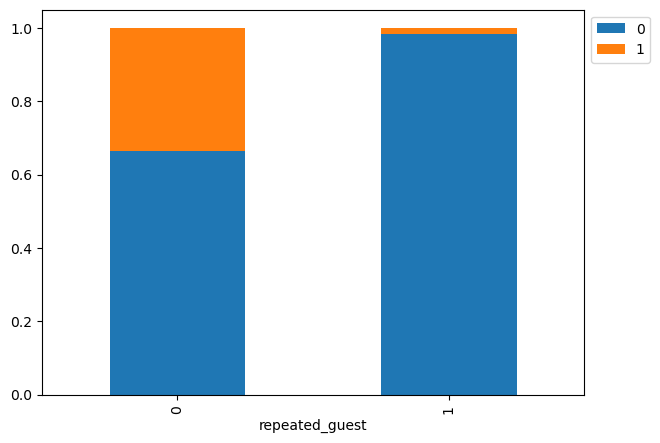

In [44]:
stacked_barplot(df, "repeated_guest", "booking_status") ## repeated guest vs booking status

* About 2% of repeated guests cancel, indicates repeating guests dont contribute to cancellations

#### 6. Many guests have special requirements when booking. Do these requirements affect booking cancellation?

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


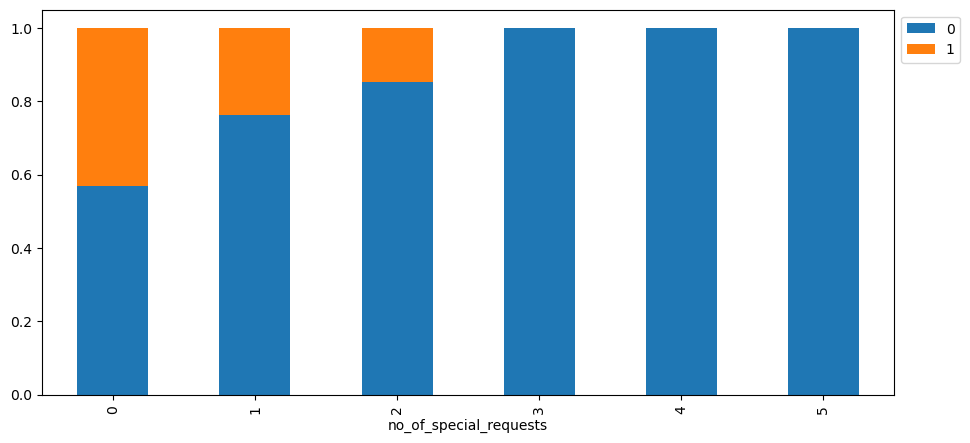

In [45]:
stacked_barplot(df, "no_of_special_requests", "booking_status") ## special requests vs booking status

* Only 30% of guests who had atleast 1 special request, cancelled
* Surprisingly, bookings with 0 special requests show maximum cancellations. Bookings with 3/4/5 special requests have no cancellations

### Additional scenarios for analysis

#### Special requests vs  average room price

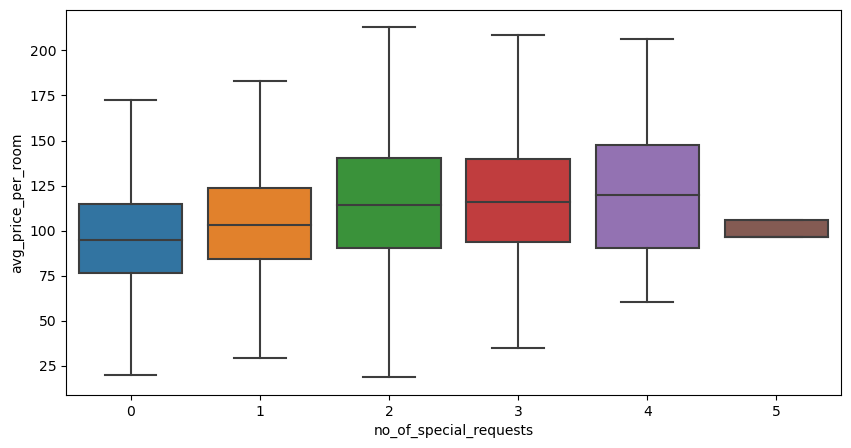

In [46]:
plt.figure(figsize=(10, 5))
## special requests vs average room price (excluding outliers)
sns.boxplot(data = df, x = "no_of_special_requests", y = "avg_price_per_room", showfliers = False) 
plt.show()

* Bookings with special requests have higher average room price

#### Booking status vs Market Segment type

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


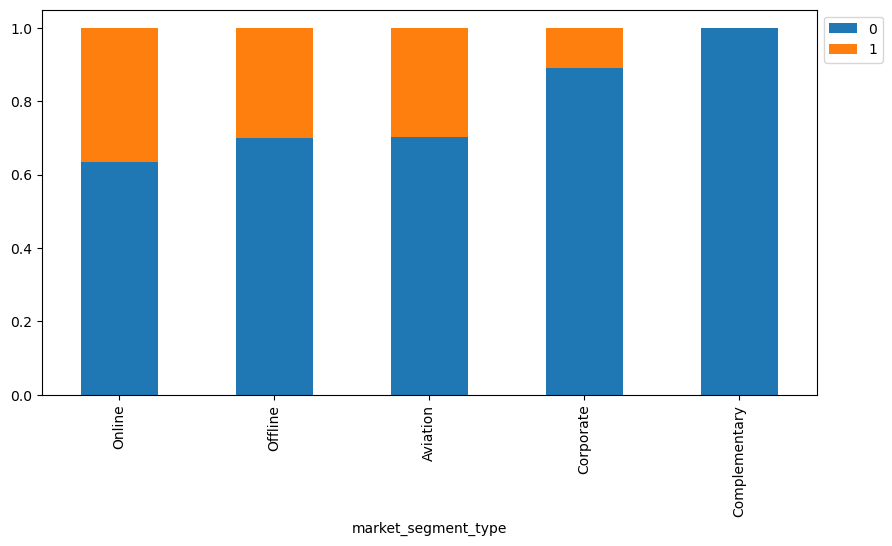

In [47]:
stacked_barplot(df, "market_segment_type", "booking_status")

* Online segment customers contribute to most cancellations(72%)

#### Booking status vs Average Room price

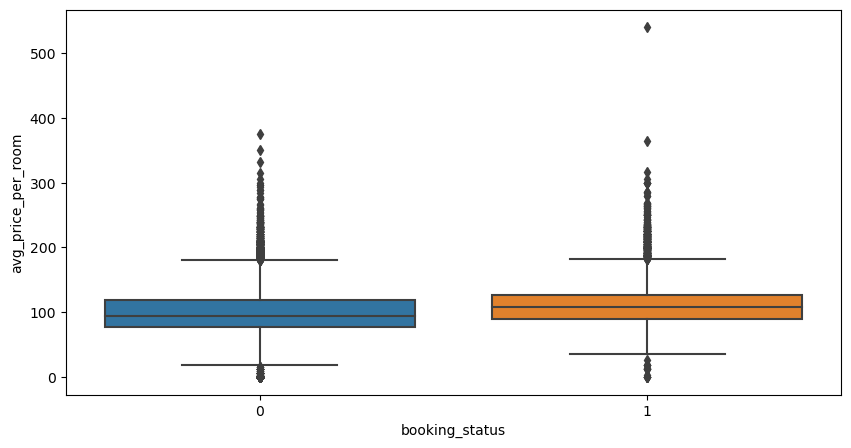

In [48]:
plt.figure(figsize=(10, 5))
## booking status vs average room price
#distribution_plot_wrt_target(df, x = "booking_status", y = "avg_price_per_room")
sns.boxplot(data = df, x = "booking_status", y = "avg_price_per_room") 
plt.show()

* Cancelled rooms (booking status - 1) have higher average room prices, positive correlation observed

#### How do room prices vary across months ?

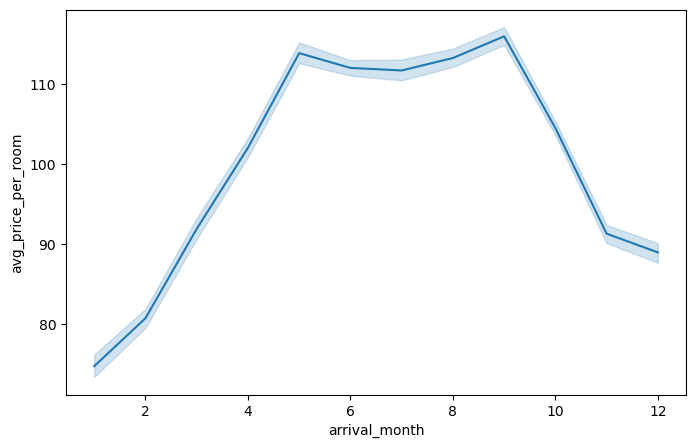

In [49]:
## lineplot between average price per room and arrival month
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="arrival_month", y="avg_price_per_room")
plt.show()

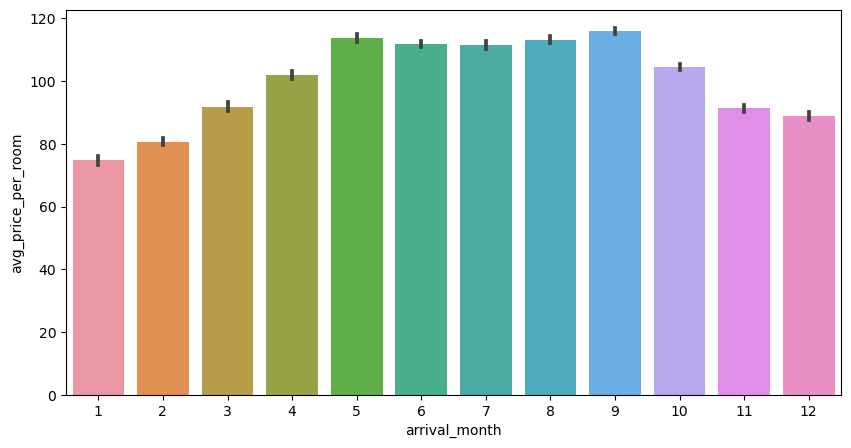

In [50]:
## barplot for average price per room vs arrival month
plt.figure(figsize=(10, 5))
sns.barplot(data = df, x = "arrival_month", y = "avg_price_per_room" )
plt.show()

In [51]:
price_vs_months = df.groupby(["arrival_month"])["avg_price_per_room"].mean()
price_vs_months

arrival_month
1     74.74976
2     80.73364
3     91.88370
4    101.99880
5    113.81068
6    111.96650
7    111.64932
8    113.20398
9    115.90692
10   104.46087
11    91.28543
12    88.95218
Name: avg_price_per_room, dtype: float64

* September, May, June, July, October months respectively ahow higest average room prices
* Hotel charges the least room prices in January,February,December

#### Booking Status vs Lead time

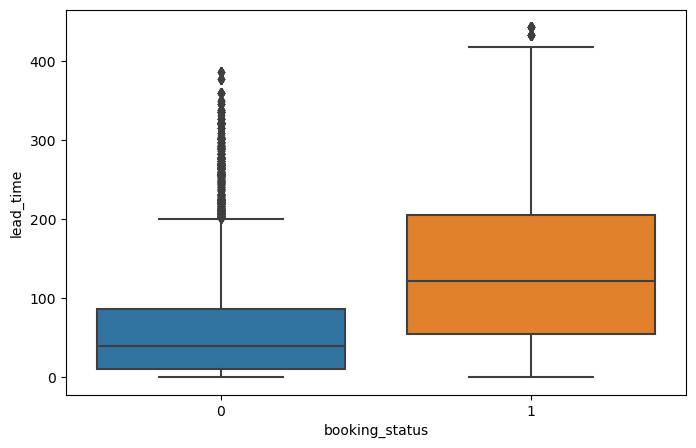

In [52]:
plt.figure(figsize=(8, 5))
## booking status vs lead time
sns.boxplot(data = df, x = "booking_status", y = "lead_time") 
plt.show()

* Cancellations (booking status - 1) have higher lead time, positive correlation observed

#### Booking status vs Number of family members

In [53]:
# family data dataframe for guests with atleast 1 child and more than 1 adult
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [54]:
# family members column = no of adults + no of children
family_data["no_of_family_members"] = (family_data["no_of_adults"] + family_data["no_of_children"])

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


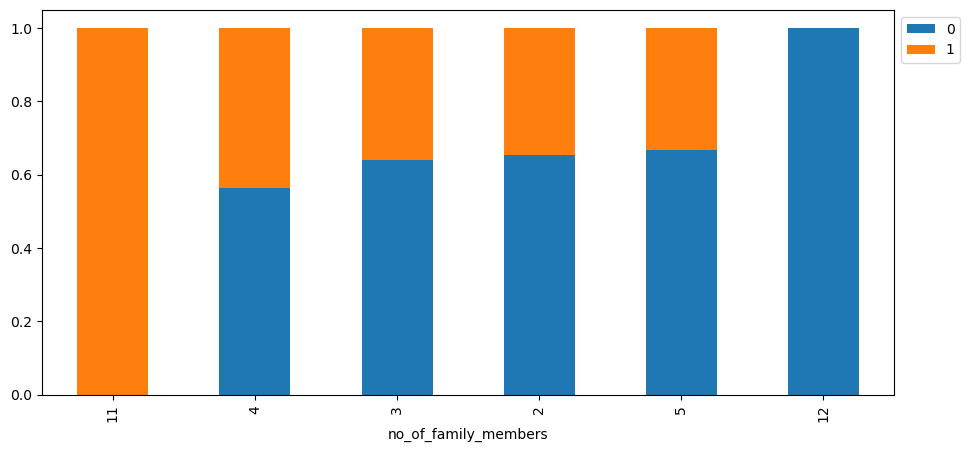

In [55]:
stacked_barplot(family_data, "no_of_family_members", "booking_status") ## no of family members and booking status

* 35% guests who canceled, travelled with atleast 2 family members

#### Booking status for customers who stay atleast a day

In [56]:
# filter dataframe for guests staying atleast one weekday and weeknight 
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [57]:
# total_days column =  no of weeknights + no of weekend nights
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

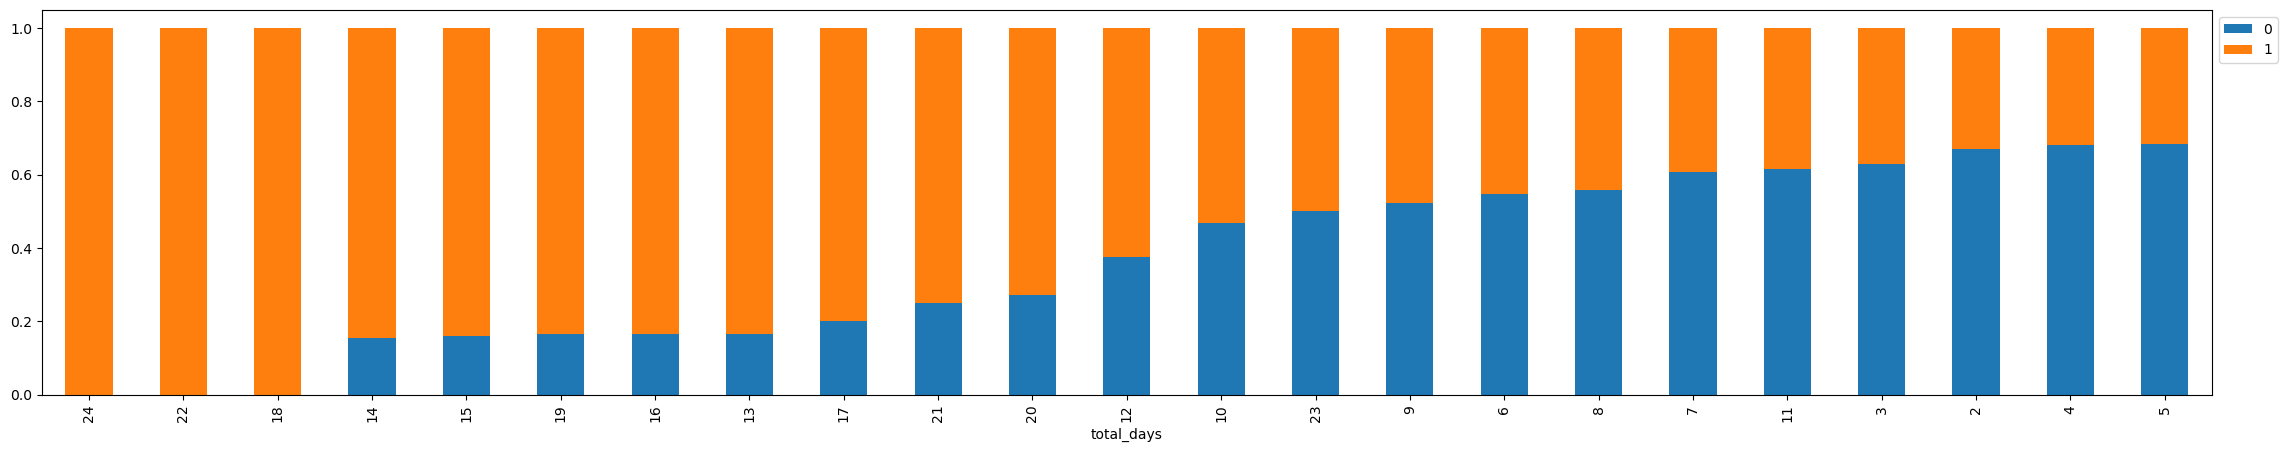

In [58]:
# stacked barplot for total_days and booking status
stacked_barplot(stay_data, "total_days", "booking_status") 

* Guests who stay just a day or two dont cancel much. Cancellations go up with increase in number of days booked
* Guests staying 3/4/5 nights respectively show most cancellations

## Data Preprocessing

#### Missing value treatment

In [59]:
df.duplicated().sum()

10275

* These duplicates are legitimate rows, duplicate scenario caused due to drop in booking id identifier, ok to continue

In [60]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* No null values in data set. No missing value treatment needed

#### Outlier detection

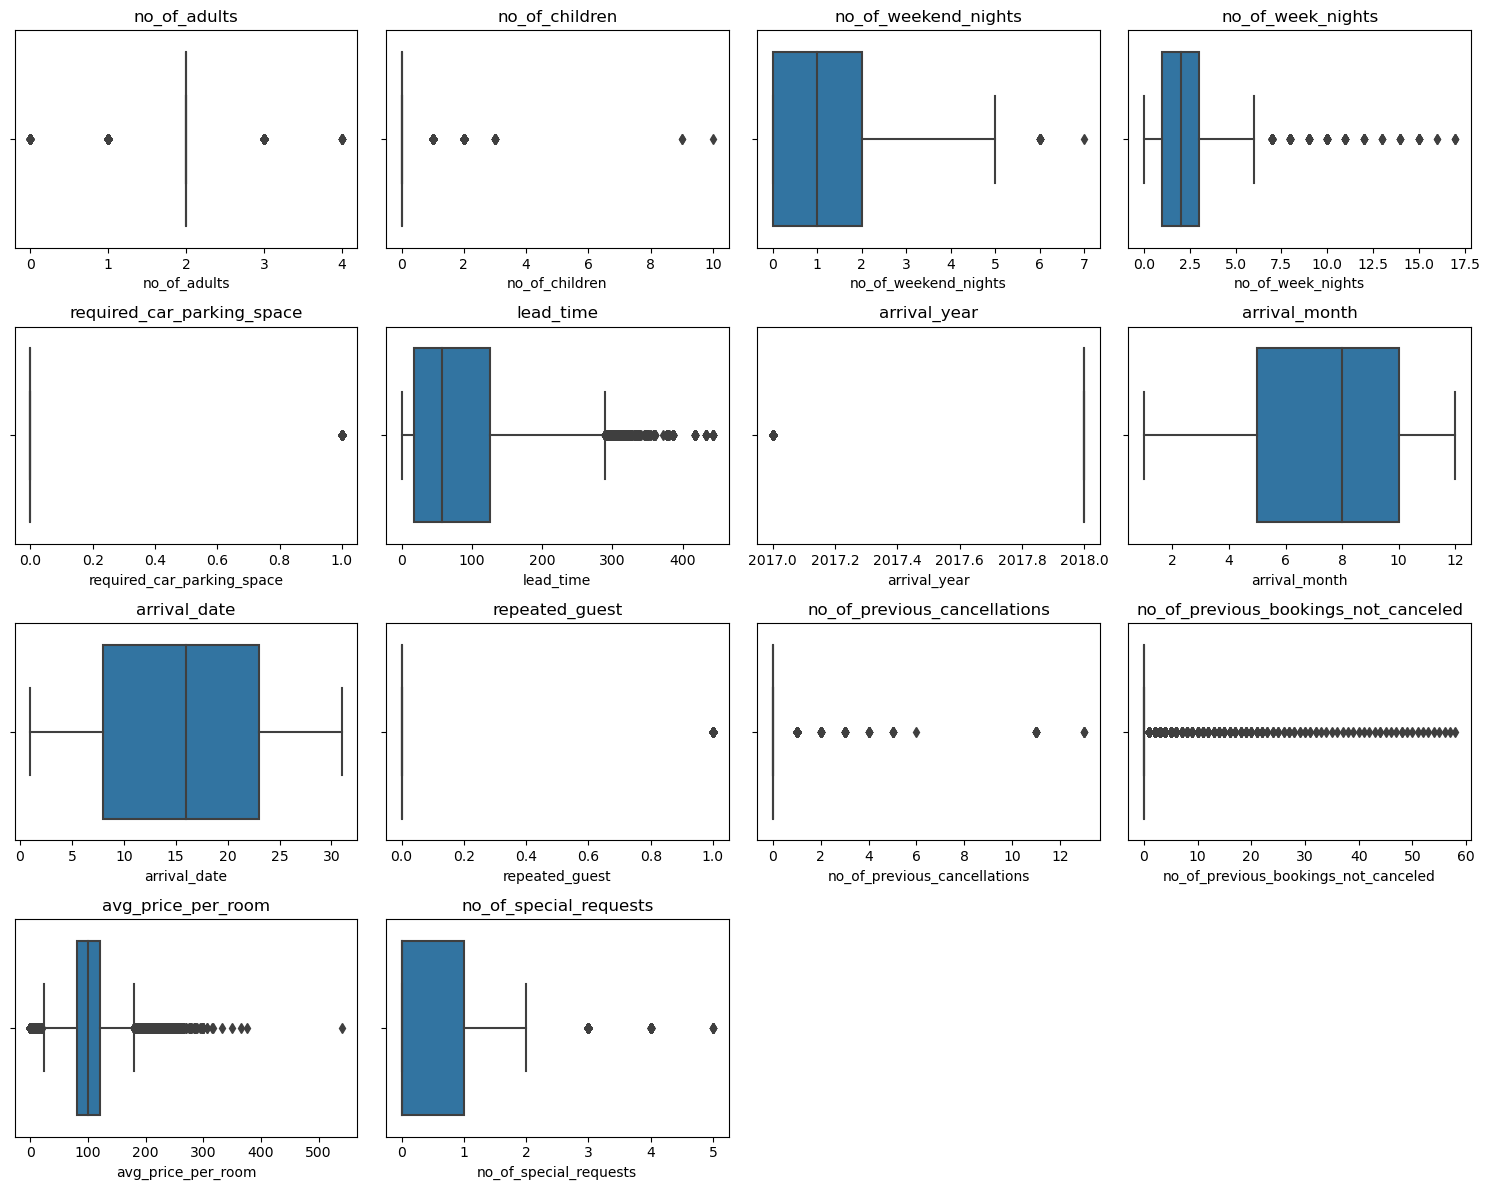

In [61]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* No of adults has lower and upper outliers
* no of children(upper outliers), no of weekend nights(upper outlier), no of weeknights (upper), lead time (upper)
* no of previous cancellations (upper outliers), no of previous booking not cancelled (upper)
* avg price per room (shows lower and upper outliers), no of special requests (upper outliers)

In [62]:
# analyze average price per room to understand room price zero

df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* Out of 545 bookings with zero average room price, 354 were complementary and hence legitimate bookings.

In [63]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  ## 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker


179.55

In [64]:
# assigning outliers the value of upper whisker 
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker


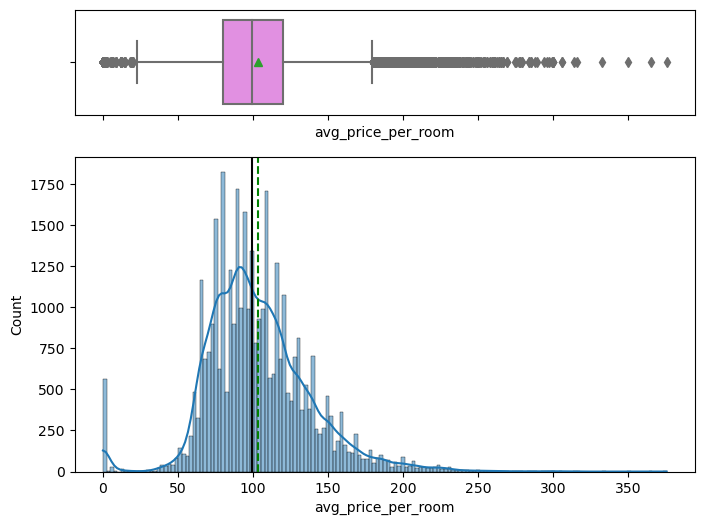

In [65]:
histogram_boxplot(df, "avg_price_per_room")   # histogram after treating avg price per room outlier

* Average price per room distribution looks more normal after treating outliers (room price greater than 500 capped at upper whisker value of 179.55 euros)

## EDA

- It is a good idea to explore data once again after manipulating

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


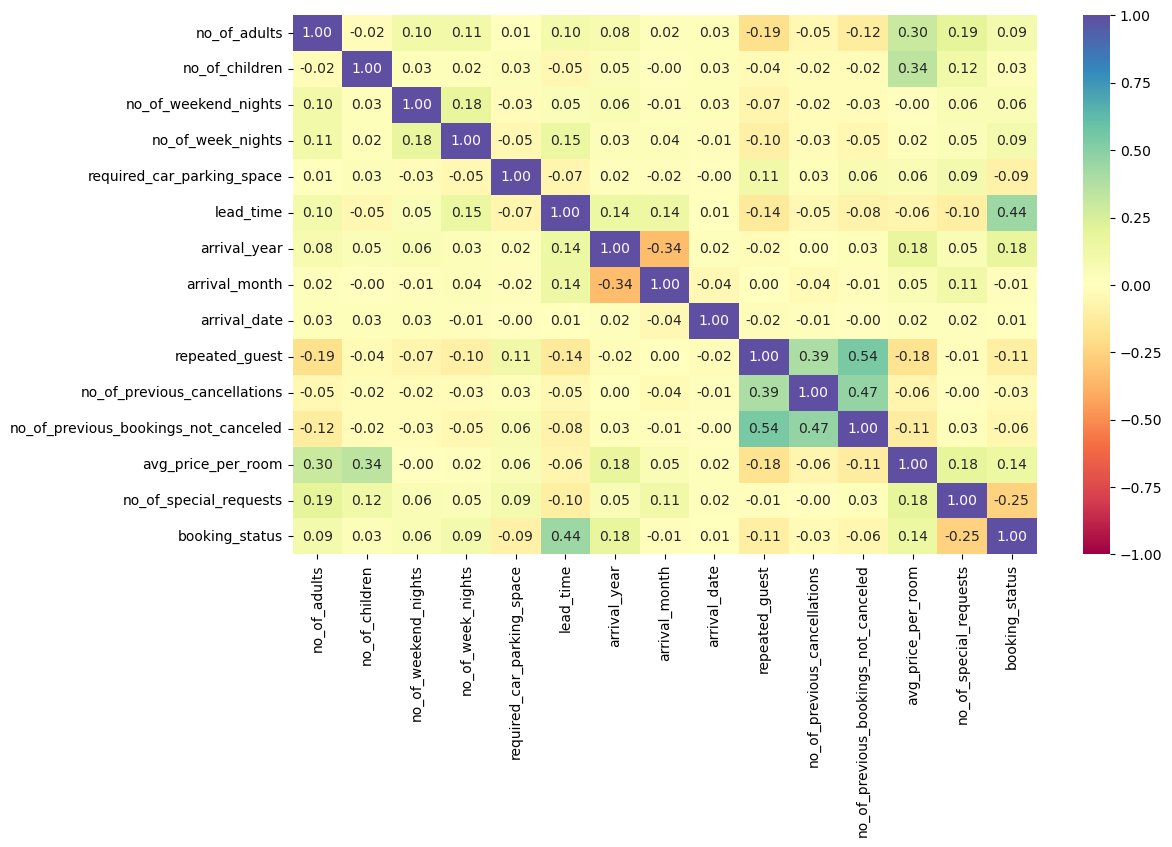

In [67]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Correlation between variables remains the same, no changes observed

In [68]:
# function to look at value counts for numeric columns

col_list = df.select_dtypes(include=["int64"]).columns.tolist()
for i in col_list:
    print(f"Value Count for {i}")
    print(df[i].value_counts())
    print(f"To verify total counts {df[i].count()}")
    print("*" * 50)
      

Value Count for no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
To verify total counts 36275
**************************************************
Value Count for no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
To verify total counts 36275
**************************************************
Value Count for no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
To verify total counts 36275
**************************************************
Value Count for no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
To verify total counts 36275
**********************

In [69]:
df["no_of_adults"].unique()

array([2, 1, 3, 0, 4], dtype=int64)

In [70]:
df["no_of_children"].unique()

array([ 0,  2,  1,  3, 10,  9], dtype=int64)

In [71]:
df["no_of_weekend_nights"].unique()

array([1, 2, 0, 4, 3, 6, 5, 7], dtype=int64)

In [72]:
df["no_of_week_nights"].unique()

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

In [73]:
df["required_car_parking_space"].unique()

array([0, 1], dtype=int64)

In [74]:
df["lead_time"].unique()

array([224,   5,   1, 211,  48, 346,  34,  83, 121,  44,   0,  35,  30,
        95,  47, 256,  99,  12, 122,   2,  37, 130,  60,  56,   3, 107,
        72,  23, 289, 247, 186,  64,  96,  41,  55, 146,  32,  57,   7,
       124, 169,   6,  51,  13, 100, 139, 117,  39,  86,  19, 192, 179,
        26,  74, 143, 177,  18, 267, 155,  46, 128,  20,  40, 196, 188,
        17, 110,  68,  73,  92, 171, 134, 320, 118, 189,  16,  24,   8,
        10, 182, 116, 123, 105, 443, 317, 286, 148,  14,  85,  25,  28,
        80,  11, 162,  82,  27, 245, 266, 112,  88,  69, 273,   4,  97,
        31,  62, 197, 280, 185, 160, 104,  22, 292, 109, 126, 303,  81,
        54,  15, 161, 147,  87, 127, 418, 156,  58, 433, 111, 195, 119,
        59,  78, 335, 103,  70,  76, 144,  49,  77,  36,  79,  21,  33,
       164, 152,  43, 102,  71, 209,  93,  53, 302, 239,  45, 167, 113,
        84,   9, 166, 174,  61, 151,  52,  67, 282,  38, 175,  89, 133,
        65,  66,  50, 159, 386, 115, 237, 125,  91,  29, 221, 21

In [75]:
df["arrival_year"].unique()

array([2017, 2018], dtype=int64)

In [76]:
df["arrival_month"].unique()

array([10, 11,  2,  5,  4,  9, 12,  7,  6,  8,  3,  1], dtype=int64)

In [77]:
df["repeated_guest"].unique()

array([0, 1], dtype=int64)

In [78]:
df["no_of_previous_cancellations"].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

In [79]:
df["no_of_previous_bookings_not_canceled"].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36], dtype=int64)

In [80]:
df["avg_price_per_room"].unique()

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [81]:
df["no_of_special_requests"].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [82]:
df["booking_status"].unique()

array([0, 1], dtype=int64)

* Based on unique values for column list, outliers seem to be legitimate. No improper or questionable values found
* No further exploration needed at this point

## Model Building

### Logistic Regression (with statsmodels library)


#### Data Preparation for modeling (Logistic Regression)

- predict which bookings will be canceled
- encode categorical features
- split data into train and test to evaluate model built on training data


In [83]:
# specify independent and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True) ## create dummies for X 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)


In [84]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


* Observations on booking status showed 67% bookings were not-canceled and 33% canceled
* This ratio is preserved in training and test set data split

In [85]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.3292
Time:                        05:27:51   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928    -687.338
no_of_adults                             0.1136      


* Booking status = 1 (canceled), Booking status = 0 (not_canceled)

* Coefficients indicate how one unit change in X affects Y(booking cancellation)
* Positive coefficients mean, probability of a booking getting canceled increases with increase in that corresponding attribute
* Negative coefficients mean, probability of a booking getting canceled decreases with increase in that corresponding attribute

* An unit increase in no_of_adults, with all other attributes held constant, increases probability of booking cancellation by 0.11
* An unit increase in no_of_repeated guests, with all other attributes held constant, decreases probability of booking cancellation by 2.34

* p-value indicates if variable is significant or not. For significance level 0.05 (5%), any variable with p-value < 0.05 would be considered significant
* arrival_date, no_of_prev_bookings_not_cancelled have pvalue > 0.05
* Dummy variables type_of_meal_plan3, room_type_reserved_4, market_segment_type_complementary,market_segment_type_online also have p value > 0.05


#### Model evaluation criteria

#### Model can make wrong predictions in two ways:

1. Predicting a guest booking will not cancel, but in reality, booking cancels (False Positive)
2. Predicting a guest will cancel, but in reality, booking does not cancel (False Negative) 

#### Which case is more important? 
 
Both cases are important:

* If we predict that a booking will not cancel and booking gets canceled, hotel loses revenue and has to bear additional costs of distribution channels, lowering room price to resell etc

* If we predict that a booking will cancel and booking isn't canceled, hotel might be unable to provide satisfactory services to guests by not being adequately staffed or prepared to host. This might damage brand equity/guest satisfaction and lead to opportunity loss


### How to reduce losses?

* Since both scenarios are to be addressed equally, hotel would want `F1 Score` to be maximized
* Greater the F1 score, higher the chances of minimizing both False Negatives and False Positives
* F1_score = (2*precision*recall)/(precision+recall)


####  Functions to calculate performance metrics and confusion matrix

* model_performance_classification_statsmodels function (check performance of models) 
* confusion_matrix_statsmodels function (plot confusion matrix)

In [86]:
# function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [87]:
# function to plot confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

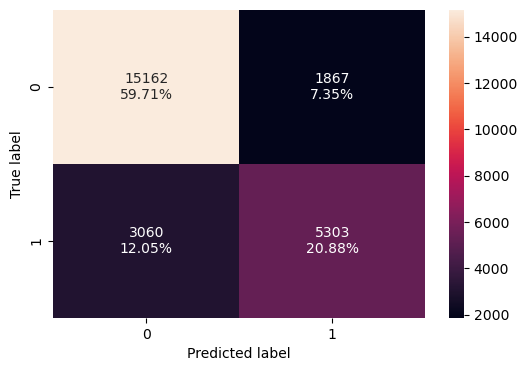

In [88]:
confusion_matrix_statsmodels(lg, X_train, y_train)   

In [89]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80596,0.63410,0.73961,0.68280



* f1_score of model is 0.68, which needs to be maximized
* Variables used to build model might contain multicollinearity, which might affect pvalues
* Multicollinearity must be checked for and removed, to get reliable coefficients and pvalues


## Checking Multicollinearity

- To make statistical inferences from a logistic regression model, it is important to ensure there is no multicollinearity. Variation Inflation Factor (VIF) is one of the methods to test for multicollinearity.

- VIF measures inflation in variances of regression coefficients estimates due to collinearities that exist among predictors.

In [90]:
# function to check VIF

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [91]:
checking_vif(X_train)

,feature,VIF
0,const,39491186.47744
1,no_of_adults,1.34849
2,no_of_children,1.97862
3,no_of_weekend_nights,1.06949
4,no_of_week_nights,1.09567
5,required_car_parking_space,1.03998
6,lead_time,1.39518
7,arrival_year,1.43167
8,arrival_month,1.27637
9,arrival_date,1.00674


#### General Rule of thumb:

- If VIF is 1, there is no correlation
- If VIF exceeds 5, there is moderate multicollinearity
- If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* None of the variables display high multi collinearity
* Some dummy variables have VIF >5 which can be ignored

### Dropping high p-value variables

* Drop the predictor variables with p-value greater than 0.05 as they do not significantly impact target variable
* But sometimes p-values change after dropping a variable, so, we'll not drop all variables at once
--  Build a model, check p-values and drop the column with highest p-value
--  Create a new model without the dropped feature, check p-values of the variables, and drop the column with the highest p-value
-- Repeat above steps till there are no columns with p-value > 0.05
* The above process can be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.


In [92]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [93]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [94]:

logit1 = sm.Logit(y_train, X_train1.astype(float)) ## logistic regression on X_train1 and y_train
lg1 = logit1.fit(disp=False) ## code to fit logistic regression
print(lg1.summary()) ## print summary of model


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.3282
Time:                        05:28:20   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612      0.000   -1152.953    -680.776
no_of_adults                       0.1087      0.037      2.916      0.

* After treating for multicollinearity, this model lg1 has dropped the 6 variables with pvalue > 0.05
* Now, all categorical variables have pvalue < 0.05. 
* X_train1 can be considered as final list of features, lg1 can be considered final model

In [95]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80537,0.63243,0.73900,0.68157


In [96]:
print("Test performance:")
model_performance_classification_statsmodels(lg1, X_test1, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


* No significant change in model performance observed between lg and lg1 models
* lg1 model shows comparable results between training and test data sets, indicates generalized result and not overfitting
* We will continue to work on improving F1 score (0.68)

#### Converting coefficients to odds

- Coefficients of logistic regression model are in terms of log(odds), to find the odds we have to take exponential of the coefficients.Therefore, odds = exp(b)
- Percentage change in odds is given as odds = (exp(b) - 1) * 100


In [97]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

,Odds,Change_odd%
const,0.00000,-100.00000
no_of_adults,1.11487,11.48701
no_of_children,1.16411,16.41072
no_of_weekend_nights,1.11466,11.46616
no_of_week_nights,1.04260,4.25996
required_car_parking_space,0.20298,-79.70242
lead_time,1.01583,1.58342
arrival_year,1.57291,57.29054
arrival_month,0.95841,-4.15858
repeated_guest,0.06484,-93.51608


#### Coefficient Interpretations

* no_of_adults: Unit increase in number of adults, increases odds of booking cancellation by 11% (holding other features constant)
* no_of_children: Unit increase in number of children, increases odds of booking cancellation by 16% (hoolding other features constant)
* no_of_weekend_nights: Unit increase in number of weekend nights, increases odds of booking cancelation by 11%
* no_of_week_nights: Unit increase in number of week nights, increases odds of booking cancelation by 4%
* required_car_parking_space: Unit increase in car park space, decreases odds of booking cancelation by 79%
* lead_time: Unit increase in lead time, increases odds of booking cancelation by 1.5%
* repeated_guest: Unit increase in repeated guest, decreases odds of booking cancelation by 93%
* no_of_previous_cancellations: Unit increase in previous cancelations, increases odds of booking cancelation by 25%
* avg_price_per_room: Unit increase in average room price, increases odds of booking cancelation by 2%
* no_of_special_requests: Unit increase in number of special requests, decreases odds of booking cancelation by 77%
* type_of_meal_plan_not_selected: Unit increase in meal plan not selected, increases odds of booking cancelation by 33%
* room_type_reserved: Unit increase in Room type 7, the odds of cancelation goes down by 76%, for room type 6, cancelation odds decreases by 61%
* market_segment_type: unit increase in offline segment type, decreases odds of cancelation by 83%, unit increase in corporate segment decreases cancellation odds by 54%


#### Checking model performance on training set

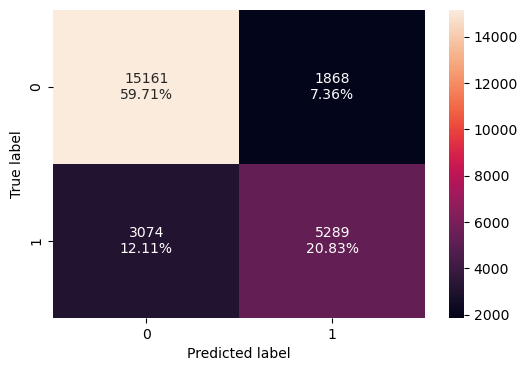

In [98]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [99]:
## check performance on X_train1 and y_train
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80537,0.63243,0.73900,0.68157


#### ROC-AUC on training set

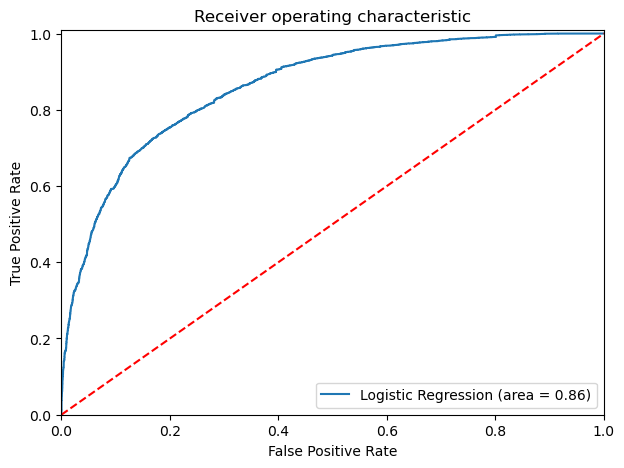

In [100]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving good performance on training set

#### Model Performance Improvement

- Check if recall score can be improved further, by changing model threshold using AUC-ROC Curve
- Then, check ROC curve, compute area under ROC curve (ROC-AUC) and use it to find optimal threshold
- Finally, check Precision-Recall curve to find right balance between precision and recall as f1_score is the metric of choice


#### Optimal threshold using AUC-ROC curve

In [101]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3696037915893037


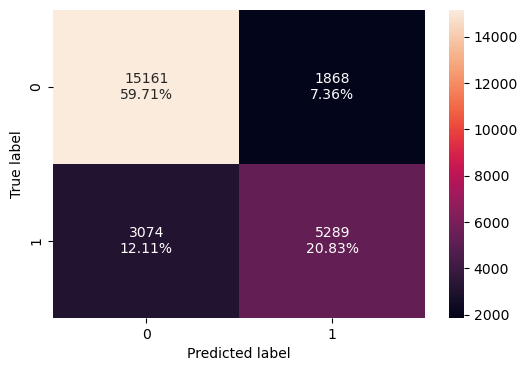

In [102]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train) 
## confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold 

In [103]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79257,0.73634,0.66790,0.70045


#### Let's use Precision-Recall curve and see if we can find a better threshold

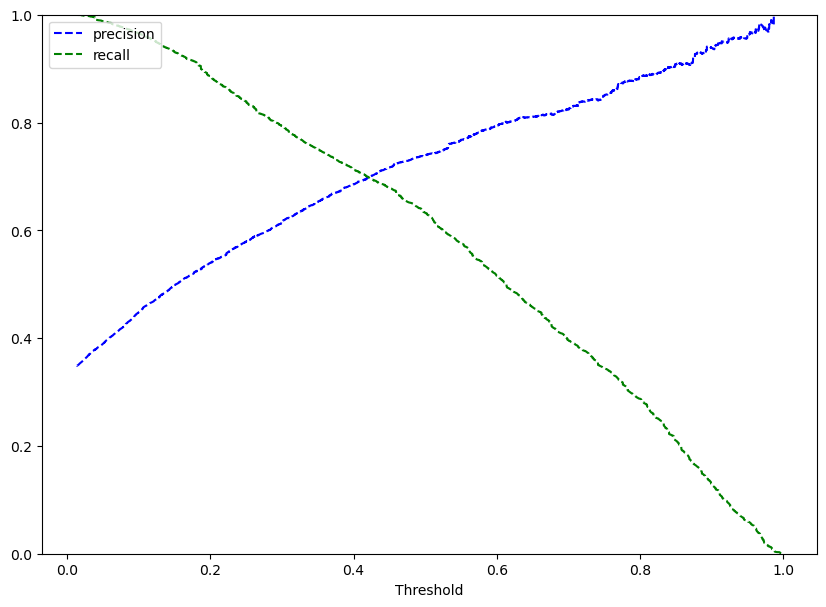

In [104]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [105]:
## setting threshold
optimal_threshold_curve = 0.42

* At the threshold of 0.42, we get balanced recall and precision

#### Checking model performance on training set

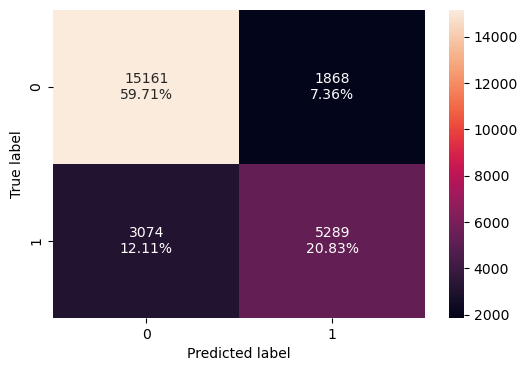

In [106]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)
## confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

In [107]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69927,0.69794,0.69860


* Recall has reduced(73 to 69%), Precision has improved (66 to 69%) but Accuracy and F1 metrics are about the same
* Model is still giving good performance

#### Let's check performance on test set

#### Using model with default threshold

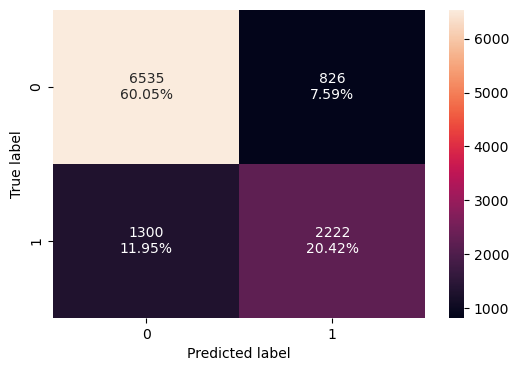

In [108]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ## confusion matrix for X_test1 and y_test

In [109]:
## performance on X_test1 and y_test
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1,y_test)

print("Test performance:")
log_reg_model_test_perf


Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


* F1 score - 67%, Accuracy - 80%, Recall - 63%, Precision - 72%
* Model is working well on test set

#### ROC Curve on test set

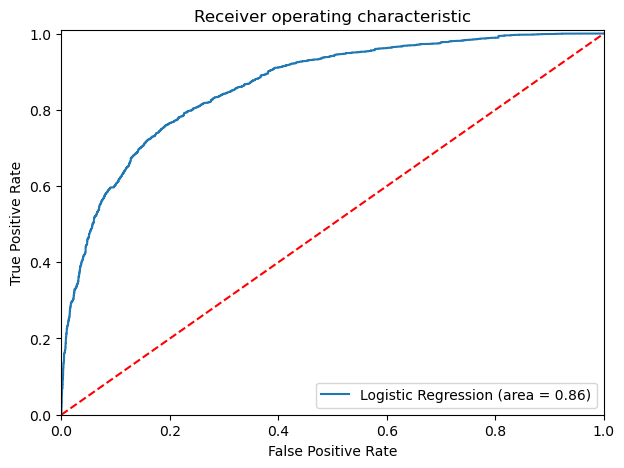

In [110]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using model with threshold=0.37

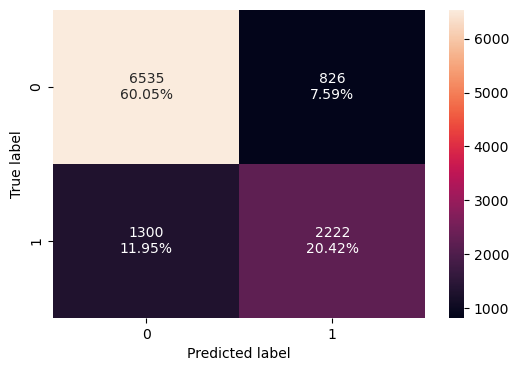

In [111]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test) 
## confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

In [112]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


#### Using model with threshold = 0.42

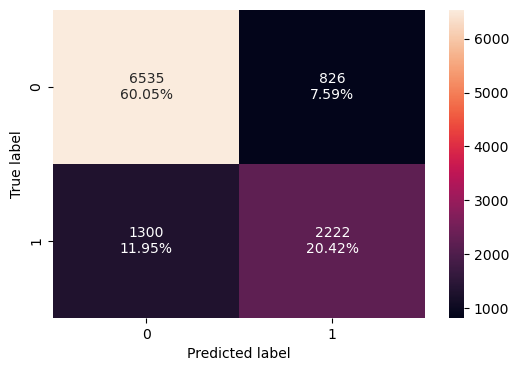

In [113]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) 
## confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

In [114]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


## Building a Logistic Regression model

## Model performance evaluation

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80537,0.79257,0.80128
Recall,0.63243,0.73634,0.69927
Precision,0.73900,0.66790,0.69794
F1,0.68157,0.70045,0.69860


In [116]:
# test performance comparison

# testing performance comparison
models_test_comp_df = pd.concat(
 [
 log_reg_model_test_perf.T,
 log_reg_model_test_perf_threshold_auc_roc.T,
 log_reg_model_test_perf_threshold_curve.T,
 ],
 axis=1,
)
models_test_comp_df.columns = [
 "Logistic Regression-default Threshold (0.5)",
"Logistic Regression-0.37 Threshold",
"Logistic Regression-0.42 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df


Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80364
Recall,0.63089,0.73964,0.70386
Precision,0.72900,0.66573,0.69381
F1,0.67641,0.70074,0.69880


## Final Model Summary

* Almost all three models are performing well on both training and test data without problem of overfitting
* Model with 0.37 threshold is giving best F1 score. Therefore it is the final model

## Building a Decision Tree model

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled
- Before model building, encode categorical features
- Split data into train and test to be able to evaluate model built on training data

In [117]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True) ## create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) 
## split data into train and test in ratio 70:30 with random_state = 1


In [118]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


####  Functions to calculate performance metrics and confusion matrix

* model_performance_classification_sklearn function to check model performances
* confusion_matrix_sklearnfunction function to plot confusion matrix

In [119]:
# function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [120]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree model

In [121]:
## Decision tree (default)

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train) ## fit decision tree on train data


DecisionTreeClassifier(random_state=1)

#### Check model performance on training set

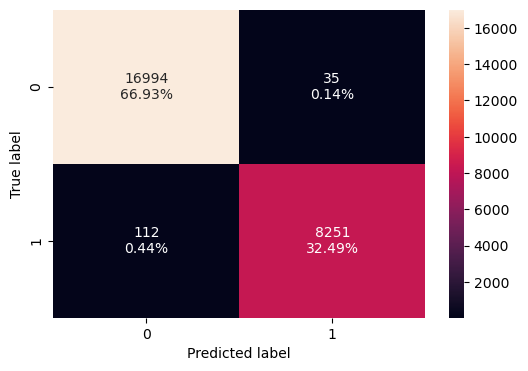

In [122]:
confusion_matrix_sklearn(model, X_train, y_train) ## confusion matrix for train data

In [123]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117



* Model is able to classify data points upto 99% accuracy on training set
* A decision tree will continue to grow and classify each data point correctly if no restrictions are applied (tree will learn all patterns in training set)
* This leads to overfitting, as Decision Tree will perform well on training set but will fail to replicate performance on test set


#### Check model performance on testing set

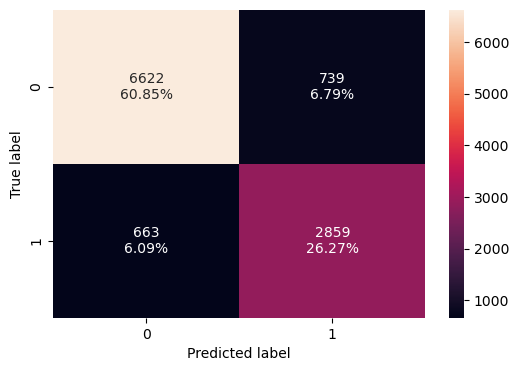

In [124]:
confusion_matrix_sklearn(model, X_test, y_test) ## confusion matrix for test data

In [125]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## performance on test set
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


* Train vs Test: Accuracy (99% vs 87%)
* Train vs Test: Recall (98% vs 81%)
* Train vs Test: Precision (99% vs 79%)
* Train vs Test: F1 (99% vs 80%)

* There is a huge disparity in performance of model on training set and test set, which suggests model is overfitting

## Do we need to prune the tree?

* Yes, Let's use pruning techniques to try and reduce overfitting
* Before pruning, lets check important features

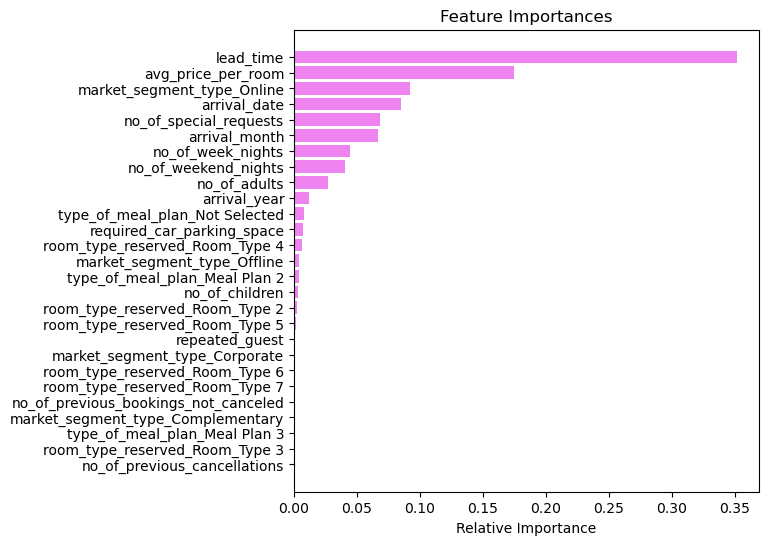

In [126]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Pre-Pruning

* Using GridSearch for Hyperparameter tuning of our tree model
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters
* It is an exhaustive search that is performed on a the specific parameter values of a model
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid

In [127]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

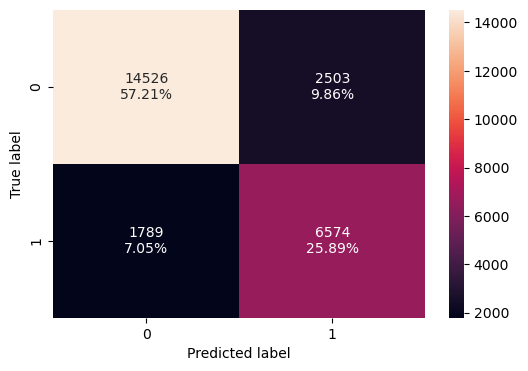

In [128]:
confusion_matrix_sklearn(estimator, X_train, y_train) ## confusion matrix for train data

In [129]:
## performance on train set
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


#### Checking performance on test set

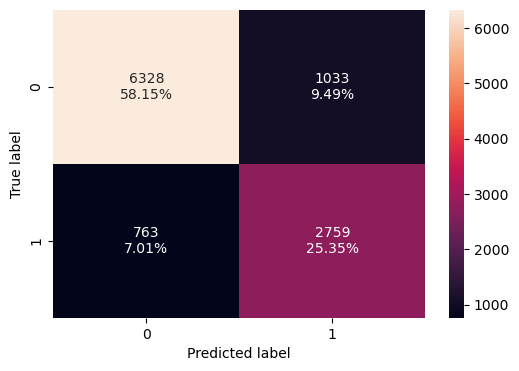

In [130]:
confusion_matrix_sklearn(estimator, X_test, y_test) ## confusion matrix for test data

In [131]:
## performance on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


* Recall scores on both train and test data are 0.78 which shows that model is able to generalize well on unseen data
* Accuracy and precision scores about the same between train and test
* This shows model is returning a generalized result

#### Visualizing Decision Tree

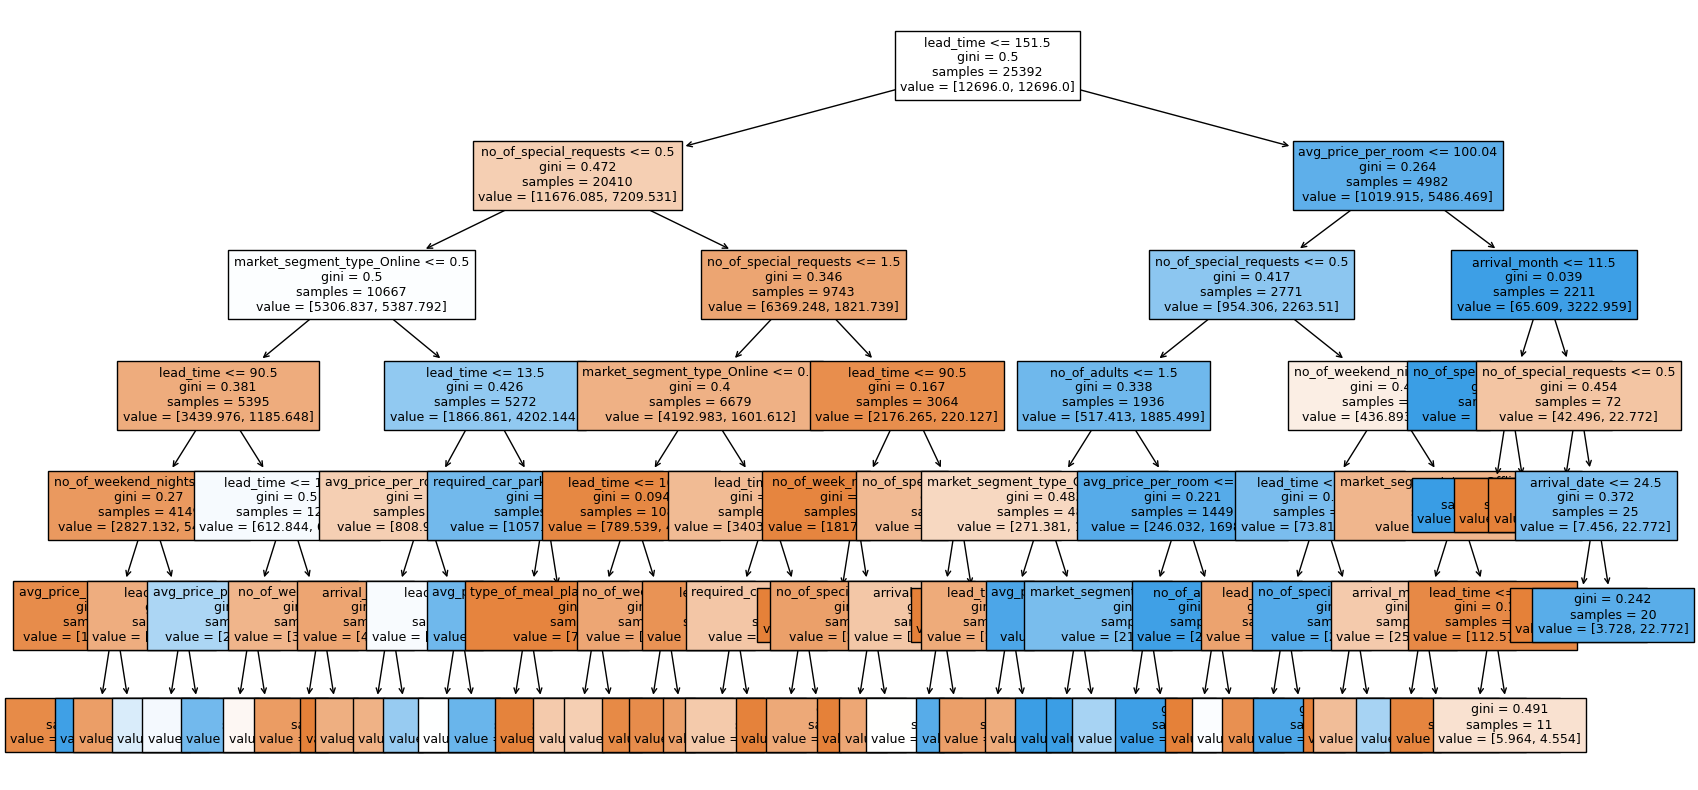

In [132]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [133]:
# Text report showing rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

#### Decision tree rule

* If lead time is < = 151.5, no_of_special_requests <= 0.5, market_segment_online <=0.5, no_of_weekights <=0.5 and avg_room_price >= 196.50, then booking is likely to cancel

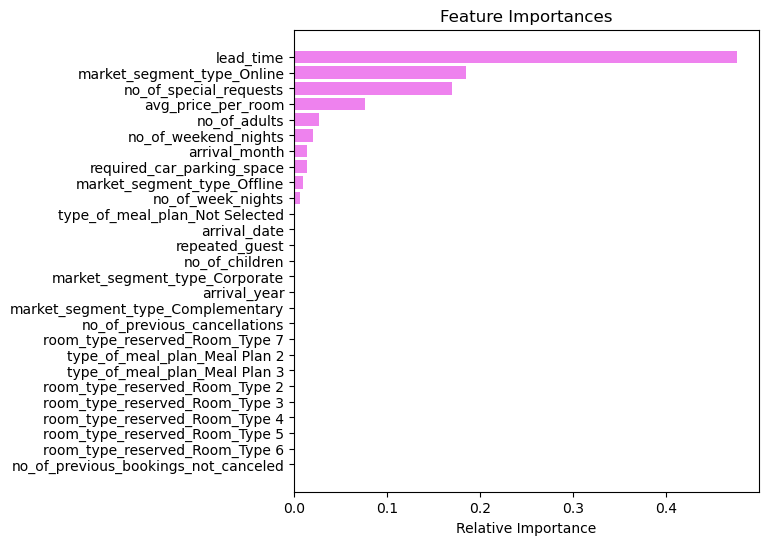

In [134]:
# importance of features in tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Pre-pruned tree: lead time, market_segment_online, special requests, average_room_price are the top 4 important features

#### Cost Complexity Pruning

* DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control tree size 
* In DecisionTreeClassifier, this pruning technique is parameterized by cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned
* Here we only show the effect of ccp_alpha on regularizing trees and how to choose a ccp_alpha based on validation scores


In [135]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [136]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1853,0.00890,0.32806
1854,0.00980,0.33786
1855,0.01272,0.35058
1856,0.03412,0.41882


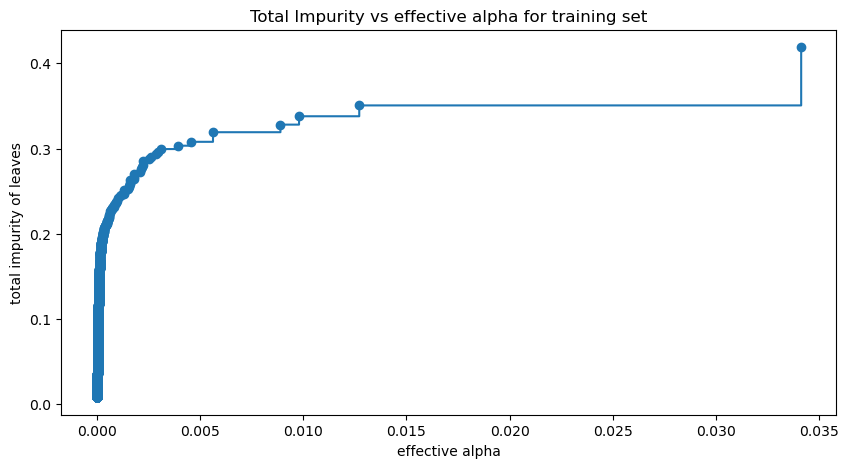

In [137]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using effective alphas
* The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [138]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) ## fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


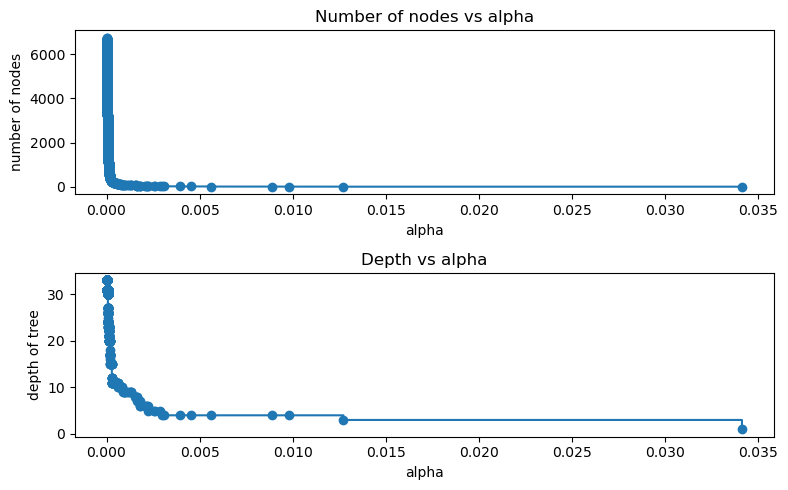

In [139]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [140]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [141]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167048,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

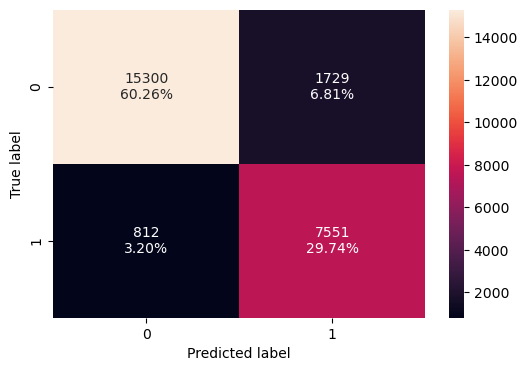

In [142]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [143]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
) # performance of train set on best model
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89993,0.90291,0.81369,0.85598


#### Checking performance on test set

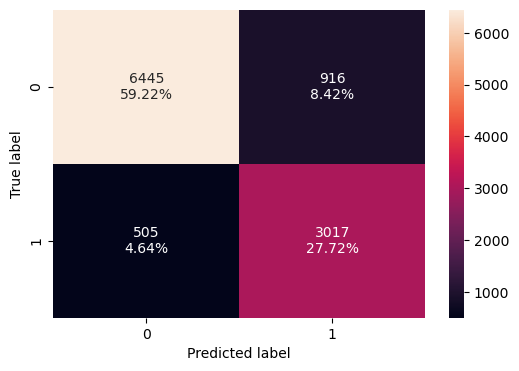

In [144]:
confusion_matrix_sklearn(best_model, X_test, y_test) #confusion matrix for test data

In [145]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
) ## performance of test set on best model
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86943,0.85662,0.76710,0.80939


* There is some change in test data compared to training metrics
* Accuracy is the same, recall, precision and f1 dropped some on test data
* This shows model is still returning a generalized result

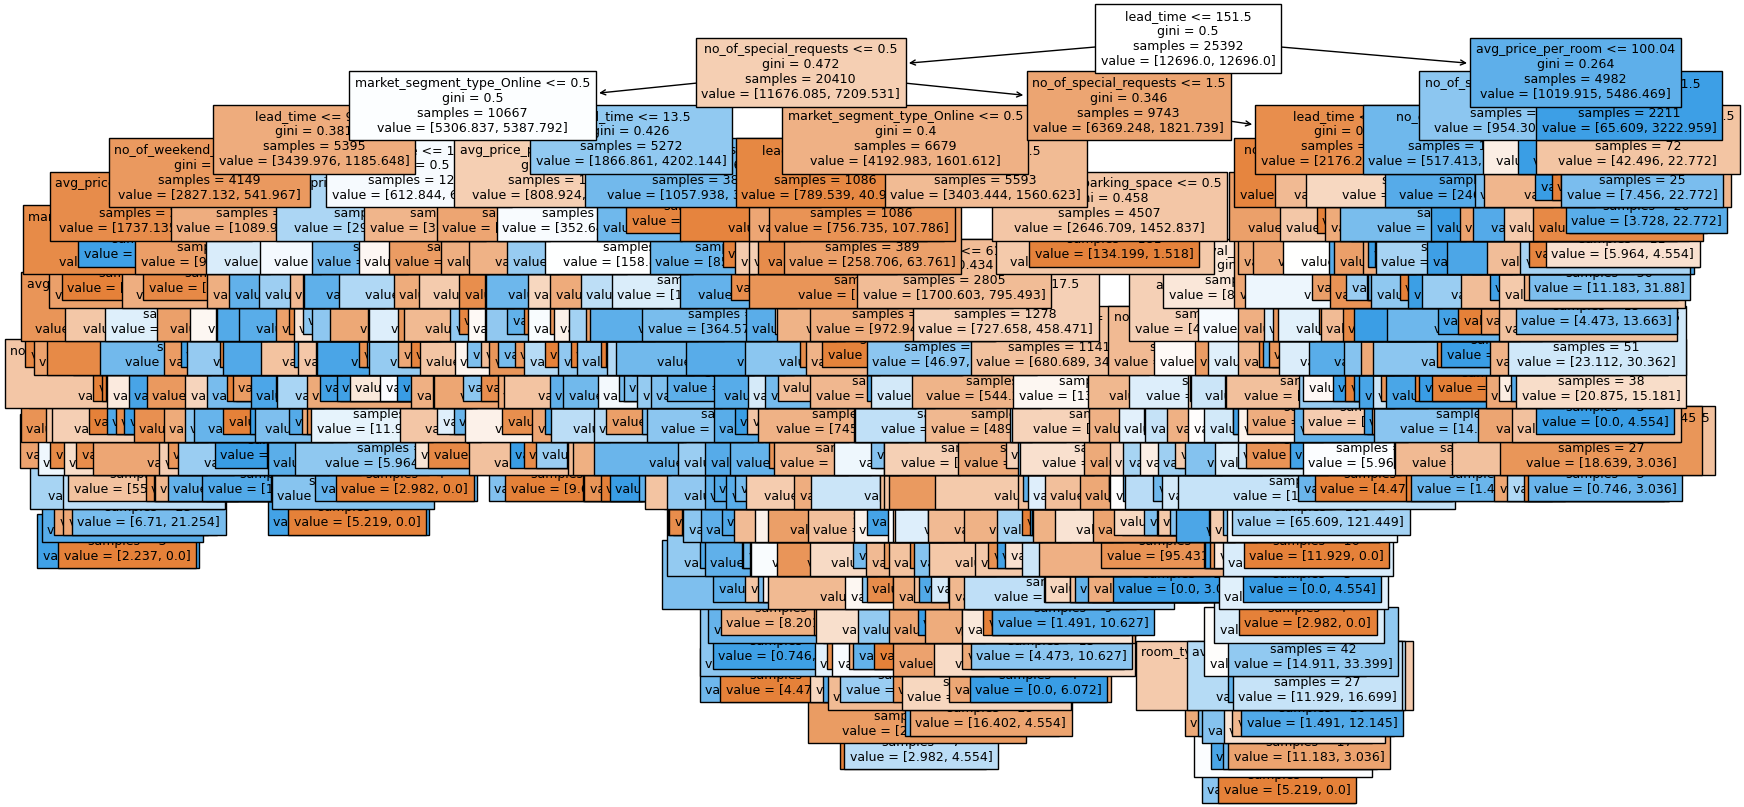

In [146]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [147]:
# Text report showing rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

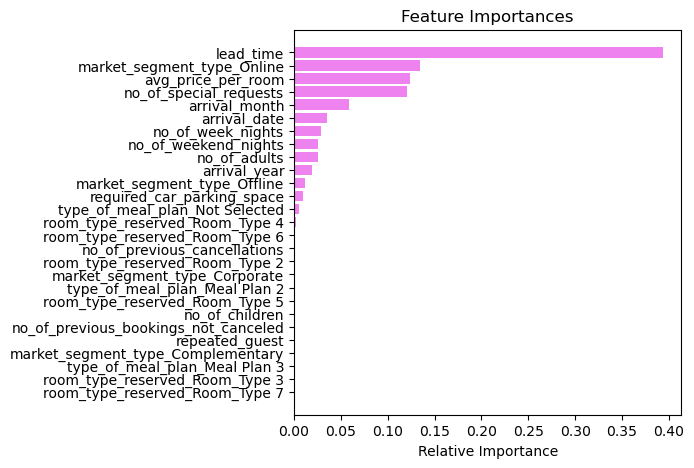

In [148]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time and market_segment_online continue to be the top two important features (as in pre pruned tree)
* There is a small change in order in Post pruned tree compared to pre pruned tree (post prune: average price per room as third important feature, pre pruned tree showed no of special requests as third feature)

## Model Performance Comparison and Conclusions

In [149]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89993
Recall,0.98661,0.78608,0.90291
Precision,0.99578,0.72425,0.81369
F1,0.99117,0.75390,0.85598


In [150]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86943
Recall,0.81175,0.78336,0.85662
Precision,0.79461,0.72758,0.76710
F1,0.80309,0.75444,0.80939


* Accuracy, Recall, Precision metrics have better values in post-pruned Decision tree compared to pre-pruned tree
* F1 score of post pruned tree is better compared to pre-pruned tree, hence Post-pruned tree is chosen as the best model

## Conclusion

* Booking cancelations for INN chain of hotels (Portugal) were analyzed using 2017 and 2018 data and a model is built, that can predict if a booking is going to get cancelled or not
* The best model from post-pruned decision tree in this analysis has an F1 score of 80%,accuracy of 86%, with right balance between precision and recall

* Data had no null or duplicate values that needed to be treated
* Average no of weeknights stayed is 3, max is 17
* Out of 4 unique meal plans, meal plan1 is most common
* Car park space is not a popular feature among guest bookings
* Out of unique room types, room type 1 is most preferred
* Average booking lead time is about 85 days. Ranges between 0 - 443 days.
* There are 5 unique customer market segment types, Online being the most common
* Repeated guests do not seem very common in hotel
* Number of previous cancellations is very low, meaning most guests are first timers at hotel
* Average room price is about 103 Euros, maximum value can go upto 540 euros
* Some guests can request upto 5 special requests at time of booking. Increase in number of special requests dont directly impact cancelations
* Majority of bookings are not cancelled, which is a positive sign

## Insights/Recommendations

####  What profitable policies for cancellations and refunds can the hotel adopt?

* Booking lead time, market segment type, average room price, number of special requests are the top 4 most important variables in predicting whether a booking will cancel or not. Increase in these 4 attributes, tends to increase probability of booking getting cancelled

* Other impacting variables are: Arrival month, number of weeknights/weekend days stayed, number of adults staying, type of meal plan not selected

* Increase in lead time, increases cancelation probablity. Hotel can clearly display booking cancelation policy with a cancellation deadline at time of booking (canceling on/before this date, incurs cancellation fee of x amount etc)

* Higher average room price, increases probablity of cancelation. Hotel cancelation policy can be slighly more relaxed/flexible for higher room priced guests

* Online market makes up 64% bookings and online segment impacts booking cancelation(72%). Hotel must clearly display cancelation/refund policy on their booking page at time of booking

* Bookings with more special requests have higher average room price. Hotel must be transparent and upfront about special request pricing and availability at time of booking to reduce cancelation for those reasons

* Increase in arrival month, increases probablity cancelation. September, May, June, July, October months respectively show higest average room prices. October, September, August are the busiest months. Hotel must ensure adequate staff and resource coverage to ensure customer satisfaction and brand equity.

* Hotel can run specials during off season months, Jan, Feb, March to up bookings

* Hotel has to stay competetive with pricing model, longer the number of weeknight/weekend nights stayed, the better pricing slab that can be offered to guests

* Hotel can provide easy customizations right at time of booking to encourage guests to select meal plan along with stay


####  What other recommedations would you suggest to the hotel?

* InnHotels needs to look at more data to analyze year over year trends/patterns (this model was analyzed using 2017 and 2018 data). 2018 alone contributed to 82% of bookings in analyzed dataset

* Hotel industry is back to normal, Innhotels can investigate if there is a need to roll back/tighten policies that were relaxed due to covid pandemic impact

* Only 2% repeating_guests canceled, creating a loyalty program would be incentive for guests to become members and enjoy loyalty benefits, in turn helps boost repeat guest bookings

* Innhotels can analyze 2019 and newer data to understand revenue impact of corona virus pandemic. If they modified their cancellation/rebooking plans to be generous, they can revisit that policy

* All above recommendations can be implemented based on actual location/property and booked rate. Separate machine learning models can be built for specific regions/markets of Innhotels
